In [67]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
from joblib import dump, load
import joblib

## 0. DataFrame

In [68]:
football_df = pd.read_csv('data/all_data_with_elo.csv', low_memory = False)
football_df

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,...,AHh,B365AHH,B365AHA,AHCh,B365CAHH,B365CAHA,B365>2.5,B365<2.5,HomeTeamELO,AwayTeamELO
0,0,D1,2003/8/1,Bayern Munich,Ein Frankfurt,3,1,H,17.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1859.379272,1593.249268
1,1,F1,2003/8/1,Lille,Lyon,1,0,H,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1612.968018,1726.539795
2,2,F1,2003/8/2,Auxerre,Nice,1,2,A,NaN,NaN,...,-0.75,2.050,1.850,NaN,NaN,NaN,NaN,NaN,1702.604858,1611.196045
3,3,F1,2003/8/2,Guingamp,Marseille,0,1,A,NaN,NaN,...,0.00,1.925,1.975,NaN,NaN,NaN,NaN,NaN,1685.016113,1665.625732
4,4,D1,2003/8/2,Hamburg,Hannover,0,3,A,10.0,16.0,...,-0.75,1.800,2.100,NaN,NaN,NaN,NaN,NaN,1718.566284,1649.805298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39044,39044,SP1,2025/5/4,Sociedad,Ath Bilbao,0,0,D,12.0,3.0,...,-0.25,2.100,1.700,-0.25,2.14,1.77,2.63,1.50,1683.467285,1797.882568
39045,39045,E0,2025/5/4,West Ham,Tottenham,1,1,D,11.0,7.0,...,-0.25,1.750,2.050,-0.50,1.84,2.06,1.57,2.38,1729.567261,1790.107788
39046,39046,E0,2025/5/5,Crystal Palace,Nott'm Forest,1,1,D,20.0,12.0,...,-0.25,1.930,1.850,-0.25,1.87,2.03,2.01,1.89,1807.064453,1802.088501
39047,39047,I1,2025/5/5,Genoa,Milan,1,2,A,11.0,10.0,...,0.75,1.800,1.980,0.75,1.92,1.98,1.99,1.91,1656.094849,1783.127075


In [69]:
# 提前6个月，用来划分赛季
# 将字符串转换为日期类型，指定日期格式
football_df['Date'] = pd.to_datetime(football_df['Date'], format='%Y/%m/%d')
football_df['Date'] = football_df['Date'] - pd.DateOffset(months=6)
football_df

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,...,AHh,B365AHH,B365AHA,AHCh,B365CAHH,B365CAHA,B365>2.5,B365<2.5,HomeTeamELO,AwayTeamELO
0,0,D1,2003-02-01,Bayern Munich,Ein Frankfurt,3,1,H,17.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1859.379272,1593.249268
1,1,F1,2003-02-01,Lille,Lyon,1,0,H,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1612.968018,1726.539795
2,2,F1,2003-02-02,Auxerre,Nice,1,2,A,NaN,NaN,...,-0.75,2.050,1.850,NaN,NaN,NaN,NaN,NaN,1702.604858,1611.196045
3,3,F1,2003-02-02,Guingamp,Marseille,0,1,A,NaN,NaN,...,0.00,1.925,1.975,NaN,NaN,NaN,NaN,NaN,1685.016113,1665.625732
4,4,D1,2003-02-02,Hamburg,Hannover,0,3,A,10.0,16.0,...,-0.75,1.800,2.100,NaN,NaN,NaN,NaN,NaN,1718.566284,1649.805298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39044,39044,SP1,2024-11-04,Sociedad,Ath Bilbao,0,0,D,12.0,3.0,...,-0.25,2.100,1.700,-0.25,2.14,1.77,2.63,1.50,1683.467285,1797.882568
39045,39045,E0,2024-11-04,West Ham,Tottenham,1,1,D,11.0,7.0,...,-0.25,1.750,2.050,-0.50,1.84,2.06,1.57,2.38,1729.567261,1790.107788
39046,39046,E0,2024-11-05,Crystal Palace,Nott'm Forest,1,1,D,20.0,12.0,...,-0.25,1.930,1.850,-0.25,1.87,2.03,2.01,1.89,1807.064453,1802.088501
39047,39047,I1,2024-11-05,Genoa,Milan,1,2,A,11.0,10.0,...,0.75,1.800,1.980,0.75,1.92,1.98,1.99,1.91,1656.094849,1783.127075


## 1. Descriptive Statistics 

**1.1 DataFrame Shape**

In [70]:
# no. rows and no. cols
football_df.shape

(39049, 28)

In [71]:
# feature names
print(football_df.columns.tolist())

['Unnamed: 0', 'Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HS', 'AS', 'HST', 'AST', 'B365H', 'B365D', 'B365A', 'WHH', 'WHD', 'WHA', 'AHh', 'B365AHH', 'B365AHA', 'AHCh', 'B365CAHH', 'B365CAHA', 'B365>2.5', 'B365<2.5', 'HomeTeamELO', 'AwayTeamELO']


**1.2 NaN Values**

In [72]:
football_df.isnull().sum()

Unnamed: 0         0
Div                0
Date               0
HomeTeam           0
AwayTeam           0
FTHG               0
FTAG               0
FTR                0
HS              1762
AS              1762
HST             2568
AST             2568
B365H             49
B365D             49
B365A             49
WHH              863
WHD              863
WHA              863
AHh              262
B365AHH          277
B365AHA          277
AHCh           28479
B365CAHH       28481
B365CAHA       28481
B365>2.5       26335
B365<2.5       26335
HomeTeamELO      125
AwayTeamELO      126
dtype: int64

In [73]:
# total elements in 
football_df.size

1093372

In [74]:
# total number of NaN
football_df.size - football_df.count().sum()

150574

In [75]:
# total number of NaN rows
football_df.isnull().any(axis = 1).sum()

28795

In [76]:
# total number of NaN columns
football_df.isnull().any(axis = 0).sum()

20

## 2. Data Wrangling and Feature Transformation/Development

### 2.1 NaN Handling

`TODO`: drop NaN values along columns: {Date, Home Team, Away Team, FTR} <br>
`TODO`: identify betting odds w/ most available data

In [77]:
# 当前方法仅提取这几个字段 分区 日期 主队 客队 full-time-result 三家机构的胜平负 主队ELO评分 客队ELO评分
# nan_mask = ['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTR', 'B365H', 'B365D', 'B365A', 
#             'IWH', 'IWD', 'IWA', 'WHH', 'WHD', 'WHA', 'AHh', 'B365AHH', 'B365AHA', 'HomeTeamELO', 'AwayTeamELO']
# nan_mask = ['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'B365H', 'B365D', 'B365A', 'WHH', 'WHD', 'WHA', 'AHh', 'B365AHH', 'B365AHA', 'HomeTeamELO', 'AwayTeamELO']
nan_mask = ['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'B365H', 'B365D', 'B365A', 'AHh', 'B365AHH', 'B365AHA', 'HomeTeamELO', 'AwayTeamELO']

In [78]:
nan_football_df = football_df.dropna(subset = nan_mask)
nan_football_df

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,...,AHh,B365AHH,B365AHA,AHCh,B365CAHH,B365CAHA,B365>2.5,B365<2.5,HomeTeamELO,AwayTeamELO
2,2,F1,2003-02-02,Auxerre,Nice,1,2,A,NaN,NaN,...,-0.75,2.050,1.850,NaN,NaN,NaN,NaN,NaN,1702.604858,1611.196045
3,3,F1,2003-02-02,Guingamp,Marseille,0,1,A,NaN,NaN,...,0.00,1.925,1.975,NaN,NaN,NaN,NaN,NaN,1685.016113,1665.625732
4,4,D1,2003-02-02,Hamburg,Hannover,0,3,A,10.0,16.0,...,-0.75,1.800,2.100,NaN,NaN,NaN,NaN,NaN,1718.566284,1649.805298
5,5,D1,2003-02-02,Hertha,Werder Bremen,0,3,A,23.0,19.0,...,-0.75,2.025,1.875,NaN,NaN,NaN,NaN,NaN,1719.916748,1692.120972
7,7,F1,2003-02-02,Lens,Le Mans,0,0,D,NaN,NaN,...,-0.75,1.900,2.000,NaN,NaN,NaN,NaN,NaN,1697.354004,1539.958130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39044,39044,SP1,2024-11-04,Sociedad,Ath Bilbao,0,0,D,12.0,3.0,...,-0.25,2.100,1.700,-0.25,2.14,1.77,2.63,1.50,1683.467285,1797.882568
39045,39045,E0,2024-11-04,West Ham,Tottenham,1,1,D,11.0,7.0,...,-0.25,1.750,2.050,-0.50,1.84,2.06,1.57,2.38,1729.567261,1790.107788
39046,39046,E0,2024-11-05,Crystal Palace,Nott'm Forest,1,1,D,20.0,12.0,...,-0.25,1.930,1.850,-0.25,1.87,2.03,2.01,1.89,1807.064453,1802.088501
39047,39047,I1,2024-11-05,Genoa,Milan,1,2,A,11.0,10.0,...,0.75,1.800,1.980,0.75,1.92,1.98,1.99,1.91,1656.094849,1783.127075


In [79]:
conditions = [
    nan_football_df['AHh'] >= 2.5,         # AHh >= 2.75
    (nan_football_df['AHh'] >= 1.5) & (nan_football_df['AHh'] <= 2.25),  # 1.75 < AHh <= 2.75
    (nan_football_df['AHh'] >= 0.25) & (nan_football_df['AHh'] <= 1.25),  # 0.25 < AHh <= 1.75
    nan_football_df['AHh'] == 0,            # AHh == 0
    (nan_football_df['AHh'] >= -1.25) & (nan_football_df['AHh'] <= -0.25),  # -1.75 < AHh <= -0.25
    (nan_football_df['AHh'] >= -2.25) & (nan_football_df['AHh'] <= -1.5),  # -2.75 < AHh <= -1.75
    nan_football_df['AHh'] <= -2.5
]
# easy_conditions = [
#     nan_football_df['AHh'] <= -0.25,
#     nan_football_df['AHh'] == 0,
#     nan_football_df['AHh'] >= 0.25,
# ]
labels = [3, 2, 1, 0, -1, -2, -3]
# easy_labels = [-1, 0, 1]

nan_football_df['balance_val'] = np.select(conditions, labels)
nan_football_df

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,...,B365AHH,B365AHA,AHCh,B365CAHH,B365CAHA,B365>2.5,B365<2.5,HomeTeamELO,AwayTeamELO,balance_val
2,2,F1,2003-02-02,Auxerre,Nice,1,2,A,NaN,NaN,...,2.050,1.850,NaN,NaN,NaN,NaN,NaN,1702.604858,1611.196045,-1
3,3,F1,2003-02-02,Guingamp,Marseille,0,1,A,NaN,NaN,...,1.925,1.975,NaN,NaN,NaN,NaN,NaN,1685.016113,1665.625732,0
4,4,D1,2003-02-02,Hamburg,Hannover,0,3,A,10.0,16.0,...,1.800,2.100,NaN,NaN,NaN,NaN,NaN,1718.566284,1649.805298,-1
5,5,D1,2003-02-02,Hertha,Werder Bremen,0,3,A,23.0,19.0,...,2.025,1.875,NaN,NaN,NaN,NaN,NaN,1719.916748,1692.120972,-1
7,7,F1,2003-02-02,Lens,Le Mans,0,0,D,NaN,NaN,...,1.900,2.000,NaN,NaN,NaN,NaN,NaN,1697.354004,1539.958130,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39044,39044,SP1,2024-11-04,Sociedad,Ath Bilbao,0,0,D,12.0,3.0,...,2.100,1.700,-0.25,2.14,1.77,2.63,1.50,1683.467285,1797.882568,-1
39045,39045,E0,2024-11-04,West Ham,Tottenham,1,1,D,11.0,7.0,...,1.750,2.050,-0.50,1.84,2.06,1.57,2.38,1729.567261,1790.107788,-1
39046,39046,E0,2024-11-05,Crystal Palace,Nott'm Forest,1,1,D,20.0,12.0,...,1.930,1.850,-0.25,1.87,2.03,2.01,1.89,1807.064453,1802.088501,-1
39047,39047,I1,2024-11-05,Genoa,Milan,1,2,A,11.0,10.0,...,1.800,1.980,0.75,1.92,1.98,1.99,1.91,1656.094849,1783.127075,1


In [80]:
nan_football_df['asia_final_result'] = nan_football_df['FTHG'] - nan_football_df['FTAG'] + nan_football_df['balance_val']
nan_football_df

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,...,B365AHA,AHCh,B365CAHH,B365CAHA,B365>2.5,B365<2.5,HomeTeamELO,AwayTeamELO,balance_val,asia_final_result
2,2,F1,2003-02-02,Auxerre,Nice,1,2,A,NaN,NaN,...,1.850,NaN,NaN,NaN,NaN,NaN,1702.604858,1611.196045,-1,-2
3,3,F1,2003-02-02,Guingamp,Marseille,0,1,A,NaN,NaN,...,1.975,NaN,NaN,NaN,NaN,NaN,1685.016113,1665.625732,0,-1
4,4,D1,2003-02-02,Hamburg,Hannover,0,3,A,10.0,16.0,...,2.100,NaN,NaN,NaN,NaN,NaN,1718.566284,1649.805298,-1,-4
5,5,D1,2003-02-02,Hertha,Werder Bremen,0,3,A,23.0,19.0,...,1.875,NaN,NaN,NaN,NaN,NaN,1719.916748,1692.120972,-1,-4
7,7,F1,2003-02-02,Lens,Le Mans,0,0,D,NaN,NaN,...,2.000,NaN,NaN,NaN,NaN,NaN,1697.354004,1539.958130,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39044,39044,SP1,2024-11-04,Sociedad,Ath Bilbao,0,0,D,12.0,3.0,...,1.700,-0.25,2.14,1.77,2.63,1.50,1683.467285,1797.882568,-1,-1
39045,39045,E0,2024-11-04,West Ham,Tottenham,1,1,D,11.0,7.0,...,2.050,-0.50,1.84,2.06,1.57,2.38,1729.567261,1790.107788,-1,-1
39046,39046,E0,2024-11-05,Crystal Palace,Nott'm Forest,1,1,D,20.0,12.0,...,1.850,-0.25,1.87,2.03,2.01,1.89,1807.064453,1802.088501,-1,-1
39047,39047,I1,2024-11-05,Genoa,Milan,1,2,A,11.0,10.0,...,1.980,0.75,1.92,1.98,1.99,1.91,1656.094849,1783.127075,1,0


In [81]:
nan_football_df_noNone = nan_football_df.dropna(subset = nan_mask)
nan_football_df_noNone

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,...,B365AHA,AHCh,B365CAHH,B365CAHA,B365>2.5,B365<2.5,HomeTeamELO,AwayTeamELO,balance_val,asia_final_result
2,2,F1,2003-02-02,Auxerre,Nice,1,2,A,NaN,NaN,...,1.850,NaN,NaN,NaN,NaN,NaN,1702.604858,1611.196045,-1,-2
3,3,F1,2003-02-02,Guingamp,Marseille,0,1,A,NaN,NaN,...,1.975,NaN,NaN,NaN,NaN,NaN,1685.016113,1665.625732,0,-1
4,4,D1,2003-02-02,Hamburg,Hannover,0,3,A,10.0,16.0,...,2.100,NaN,NaN,NaN,NaN,NaN,1718.566284,1649.805298,-1,-4
5,5,D1,2003-02-02,Hertha,Werder Bremen,0,3,A,23.0,19.0,...,1.875,NaN,NaN,NaN,NaN,NaN,1719.916748,1692.120972,-1,-4
7,7,F1,2003-02-02,Lens,Le Mans,0,0,D,NaN,NaN,...,2.000,NaN,NaN,NaN,NaN,NaN,1697.354004,1539.958130,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39044,39044,SP1,2024-11-04,Sociedad,Ath Bilbao,0,0,D,12.0,3.0,...,1.700,-0.25,2.14,1.77,2.63,1.50,1683.467285,1797.882568,-1,-1
39045,39045,E0,2024-11-04,West Ham,Tottenham,1,1,D,11.0,7.0,...,2.050,-0.50,1.84,2.06,1.57,2.38,1729.567261,1790.107788,-1,-1
39046,39046,E0,2024-11-05,Crystal Palace,Nott'm Forest,1,1,D,20.0,12.0,...,1.850,-0.25,1.87,2.03,2.01,1.89,1807.064453,1802.088501,-1,-1
39047,39047,I1,2024-11-05,Genoa,Milan,1,2,A,11.0,10.0,...,1.980,0.75,1.92,1.98,1.99,1.91,1656.094849,1783.127075,1,0


In [82]:
nan_football_df_noNone.reset_index(inplace=True, drop=True)
nan_football_df_noNone

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,...,B365AHA,AHCh,B365CAHH,B365CAHA,B365>2.5,B365<2.5,HomeTeamELO,AwayTeamELO,balance_val,asia_final_result
0,2,F1,2003-02-02,Auxerre,Nice,1,2,A,NaN,NaN,...,1.850,NaN,NaN,NaN,NaN,NaN,1702.604858,1611.196045,-1,-2
1,3,F1,2003-02-02,Guingamp,Marseille,0,1,A,NaN,NaN,...,1.975,NaN,NaN,NaN,NaN,NaN,1685.016113,1665.625732,0,-1
2,4,D1,2003-02-02,Hamburg,Hannover,0,3,A,10.0,16.0,...,2.100,NaN,NaN,NaN,NaN,NaN,1718.566284,1649.805298,-1,-4
3,5,D1,2003-02-02,Hertha,Werder Bremen,0,3,A,23.0,19.0,...,1.875,NaN,NaN,NaN,NaN,NaN,1719.916748,1692.120972,-1,-4
4,7,F1,2003-02-02,Lens,Le Mans,0,0,D,NaN,NaN,...,2.000,NaN,NaN,NaN,NaN,NaN,1697.354004,1539.958130,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38507,39044,SP1,2024-11-04,Sociedad,Ath Bilbao,0,0,D,12.0,3.0,...,1.700,-0.25,2.14,1.77,2.63,1.50,1683.467285,1797.882568,-1,-1
38508,39045,E0,2024-11-04,West Ham,Tottenham,1,1,D,11.0,7.0,...,2.050,-0.50,1.84,2.06,1.57,2.38,1729.567261,1790.107788,-1,-1
38509,39046,E0,2024-11-05,Crystal Palace,Nott'm Forest,1,1,D,20.0,12.0,...,1.850,-0.25,1.87,2.03,2.01,1.89,1807.064453,1802.088501,-1,-1
38510,39047,I1,2024-11-05,Genoa,Milan,1,2,A,11.0,10.0,...,1.980,0.75,1.92,1.98,1.99,1.91,1656.094849,1783.127075,1,0


In [83]:
conditions = [
    nan_football_df_noNone['asia_final_result'] < 0,
    nan_football_df_noNone['asia_final_result'] == 0,
    nan_football_df_noNone['asia_final_result'] > 0,
]
easy_labels = [0, 1, 2]

nan_football_df_noNone['easy_label'] = np.select(conditions, easy_labels)
nan_football_df_noNone

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,...,AHCh,B365CAHH,B365CAHA,B365>2.5,B365<2.5,HomeTeamELO,AwayTeamELO,balance_val,asia_final_result,easy_label
0,2,F1,2003-02-02,Auxerre,Nice,1,2,A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1702.604858,1611.196045,-1,-2,0
1,3,F1,2003-02-02,Guingamp,Marseille,0,1,A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1685.016113,1665.625732,0,-1,0
2,4,D1,2003-02-02,Hamburg,Hannover,0,3,A,10.0,16.0,...,NaN,NaN,NaN,NaN,NaN,1718.566284,1649.805298,-1,-4,0
3,5,D1,2003-02-02,Hertha,Werder Bremen,0,3,A,23.0,19.0,...,NaN,NaN,NaN,NaN,NaN,1719.916748,1692.120972,-1,-4,0
4,7,F1,2003-02-02,Lens,Le Mans,0,0,D,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1697.354004,1539.958130,-1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38507,39044,SP1,2024-11-04,Sociedad,Ath Bilbao,0,0,D,12.0,3.0,...,-0.25,2.14,1.77,2.63,1.50,1683.467285,1797.882568,-1,-1,0
38508,39045,E0,2024-11-04,West Ham,Tottenham,1,1,D,11.0,7.0,...,-0.50,1.84,2.06,1.57,2.38,1729.567261,1790.107788,-1,-1,0
38509,39046,E0,2024-11-05,Crystal Palace,Nott'm Forest,1,1,D,20.0,12.0,...,-0.25,1.87,2.03,2.01,1.89,1807.064453,1802.088501,-1,-1,0
38510,39047,I1,2024-11-05,Genoa,Milan,1,2,A,11.0,10.0,...,0.75,1.92,1.98,1.99,1.91,1656.094849,1783.127075,1,0,1


In [84]:
# resize shape
football_df.shape[0] - nan_football_df_noNone.shape[0]

537

### 2.2 Feature Encoding <br>
* $\phi(Date)$ $\Rightarrow$ one column for *year*, second column for *month*, third column for *day of year*
* One hot encode Division, Home and Away Teams
* Label encode Full Time Result (Win/Draw/Loss)

In [85]:
feats = nan_mask
feats.append('easy_label')
feats.append('balance_val')

In [86]:
nan_football_df_noNone

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,...,AHCh,B365CAHH,B365CAHA,B365>2.5,B365<2.5,HomeTeamELO,AwayTeamELO,balance_val,asia_final_result,easy_label
0,2,F1,2003-02-02,Auxerre,Nice,1,2,A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1702.604858,1611.196045,-1,-2,0
1,3,F1,2003-02-02,Guingamp,Marseille,0,1,A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1685.016113,1665.625732,0,-1,0
2,4,D1,2003-02-02,Hamburg,Hannover,0,3,A,10.0,16.0,...,NaN,NaN,NaN,NaN,NaN,1718.566284,1649.805298,-1,-4,0
3,5,D1,2003-02-02,Hertha,Werder Bremen,0,3,A,23.0,19.0,...,NaN,NaN,NaN,NaN,NaN,1719.916748,1692.120972,-1,-4,0
4,7,F1,2003-02-02,Lens,Le Mans,0,0,D,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1697.354004,1539.958130,-1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38507,39044,SP1,2024-11-04,Sociedad,Ath Bilbao,0,0,D,12.0,3.0,...,-0.25,2.14,1.77,2.63,1.50,1683.467285,1797.882568,-1,-1,0
38508,39045,E0,2024-11-04,West Ham,Tottenham,1,1,D,11.0,7.0,...,-0.50,1.84,2.06,1.57,2.38,1729.567261,1790.107788,-1,-1,0
38509,39046,E0,2024-11-05,Crystal Palace,Nott'm Forest,1,1,D,20.0,12.0,...,-0.25,1.87,2.03,2.01,1.89,1807.064453,1802.088501,-1,-1,0
38510,39047,I1,2024-11-05,Genoa,Milan,1,2,A,11.0,10.0,...,0.75,1.92,1.98,1.99,1.91,1656.094849,1783.127075,1,0,1


In [87]:
learning_df_feat = nan_football_df_noNone.copy()[feats]
learning_df_feat

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,B365H,B365D,B365A,AHh,B365AHH,B365AHA,HomeTeamELO,AwayTeamELO,easy_label,balance_val
0,F1,2003-02-02,Auxerre,Nice,1,2,A,1.727,3.100,4.500,-0.75,2.050,1.850,1702.604858,1611.196045,0,-1
1,F1,2003-02-02,Guingamp,Marseille,0,1,A,2.500,2.875,2.625,0.00,1.925,1.975,1685.016113,1665.625732,0,0
2,D1,2003-02-02,Hamburg,Hannover,0,3,A,1.571,3.500,5.000,-0.75,1.800,2.100,1718.566284,1649.805298,0,-1
3,D1,2003-02-02,Hertha,Werder Bremen,0,3,A,1.833,3.200,3.750,-0.75,2.025,1.875,1719.916748,1692.120972,0,-1
4,F1,2003-02-02,Lens,Le Mans,0,0,D,1.571,3.250,5.500,-0.75,1.900,2.000,1697.354004,1539.958130,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38507,SP1,2024-11-04,Sociedad,Ath Bilbao,0,0,D,2.550,3.000,3.000,-0.25,2.100,1.700,1683.467285,1797.882568,0,-1
38508,E0,2024-11-04,West Ham,Tottenham,1,1,D,2.100,3.700,3.250,-0.25,1.750,2.050,1729.567261,1790.107788,0,-1
38509,E0,2024-11-05,Crystal Palace,Nott'm Forest,1,1,D,2.250,3.400,3.200,-0.25,1.930,1.850,1807.064453,1802.088501,0,-1
38510,I1,2024-11-05,Genoa,Milan,1,2,A,4.750,3.700,1.800,0.75,1.800,1.980,1656.094849,1783.127075,1,1


In [88]:
learning_df_feat.reset_index(inplace=True, drop=True)
# 保存文件作为历史文件
learning_df_feat.to_csv('.\prediction_data/history_data_balance.csv', index=False, encoding='utf-8-sig')
learning_df_feat

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,B365H,B365D,B365A,AHh,B365AHH,B365AHA,HomeTeamELO,AwayTeamELO,easy_label,balance_val
0,F1,2003-02-02,Auxerre,Nice,1,2,A,1.727,3.100,4.500,-0.75,2.050,1.850,1702.604858,1611.196045,0,-1
1,F1,2003-02-02,Guingamp,Marseille,0,1,A,2.500,2.875,2.625,0.00,1.925,1.975,1685.016113,1665.625732,0,0
2,D1,2003-02-02,Hamburg,Hannover,0,3,A,1.571,3.500,5.000,-0.75,1.800,2.100,1718.566284,1649.805298,0,-1
3,D1,2003-02-02,Hertha,Werder Bremen,0,3,A,1.833,3.200,3.750,-0.75,2.025,1.875,1719.916748,1692.120972,0,-1
4,F1,2003-02-02,Lens,Le Mans,0,0,D,1.571,3.250,5.500,-0.75,1.900,2.000,1697.354004,1539.958130,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38507,SP1,2024-11-04,Sociedad,Ath Bilbao,0,0,D,2.550,3.000,3.000,-0.25,2.100,1.700,1683.467285,1797.882568,0,-1
38508,E0,2024-11-04,West Ham,Tottenham,1,1,D,2.100,3.700,3.250,-0.25,1.750,2.050,1729.567261,1790.107788,0,-1
38509,E0,2024-11-05,Crystal Palace,Nott'm Forest,1,1,D,2.250,3.400,3.200,-0.25,1.930,1.850,1807.064453,1802.088501,0,-1
38510,I1,2024-11-05,Genoa,Milan,1,2,A,4.750,3.700,1.800,0.75,1.800,1.980,1656.094849,1783.127075,1,1


**2.2.1 Division and Home/Away Team Encoding**

In [199]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

div_encoder = OneHotEncoder()
home_encoder = OneHotEncoder()
away_encoder = OneHotEncoder()

In [200]:
onehot_div = div_encoder.fit_transform(learning_df_feat.Div.values.reshape(-1,1)).toarray().astype(int)
onehot_div_df = pd.DataFrame(onehot_div, columns = ["Div "+str(int(i)) for i in range(onehot_div.shape[1])])

onehot_home = home_encoder.fit_transform(learning_df_feat.HomeTeam.values.reshape(-1,1)).toarray().astype(int)
onehot_home_df = pd.DataFrame(onehot_home, columns = ['HomeTeam ' + str(int(i)) for i in np.arange(onehot_home.shape[1])])

onehot_away = away_encoder.fit_transform(learning_df_feat.AwayTeam.values.reshape(-1,1)).toarray().astype(int)
onehot_away_df = pd.DataFrame(onehot_away, columns = ['AwayTeam ' + str(int(i)) for i in np.arange(onehot_away.shape[1])])

In [201]:
# 保存编码器到本地
joblib.dump(div_encoder, 'div_encoder.pkl')
joblib.dump(home_encoder, 'home_encoder.pkl')
joblib.dump(away_encoder, 'away_encoder.pkl')

['away_encoder.pkl']

In [202]:
learning_df_div = pd.concat([learning_df_feat, onehot_div_df, onehot_home_df, onehot_away_df], axis = 1)
learning_df_div.drop(columns = ['Div'], inplace = True)

In [203]:
learning_df_div

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,B365H,B365D,B365A,WHH,...,AwayTeam 197,AwayTeam 198,AwayTeam 199,AwayTeam 200,AwayTeam 201,AwayTeam 202,AwayTeam 203,AwayTeam 204,AwayTeam 205,AwayTeam 206
0,2003-02-02,Auxerre,Nice,1,2,A,1.727,3.100,4.500,1.66,...,0,0,0,0,0,0,0,0,0,0
1,2003-02-02,Guingamp,Marseille,0,1,A,2.500,2.875,2.625,2.60,...,0,0,0,0,0,0,0,0,0,0
2,2003-02-02,Hamburg,Hannover,0,3,A,1.571,3.500,5.000,1.57,...,0,0,0,0,0,0,0,0,0,0
3,2003-02-02,Hertha,Werder Bremen,0,3,A,1.833,3.200,3.750,1.72,...,0,0,1,0,0,0,0,0,0,0
4,2003-02-02,Lens,Le Mans,0,0,D,1.571,3.250,5.500,1.66,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37475,2024-08-16,Rennes,Lille,0,2,A,2.700,3.250,2.700,2.50,...,0,0,0,0,0,0,0,0,0,0
37476,2024-08-16,Tottenham,Man United,1,0,H,2.450,3.750,2.620,2.45,...,0,0,0,0,0,0,0,0,0,0
37477,2024-08-16,Udinese,Empoli,3,0,H,1.800,3.500,4.750,1.80,...,0,0,0,0,0,0,0,0,0,0
37478,2024-08-16,Valladolid,Sevilla,0,4,A,4.000,3.400,1.950,3.90,...,0,0,0,0,0,0,0,0,0,0


**2.2.2 Full Time Result Encoding**

In [204]:
target_encoder = LabelEncoder()
learning_df_div['Result'] = target_encoder.fit_transform(learning_df_div.easy_label) 
# learning_df_div['Result'] = target_encoder.fit_transform(learning_df_div.FTR)

In [205]:
joblib.dump(target_encoder, 'target_encoder.pkl')

['target_encoder.pkl']

**2.2.3 Date Encoding**

In [206]:
learning_df_div['Year'] = pd.DatetimeIndex(learning_df_div.Date).year

learning_df_div['Month'] = pd.DatetimeIndex(learning_df_div.Date).month
learning_df_div['Sin_Month'] = np.sin(2*np.pi*learning_df_div.Month/12)
learning_df_div['Cos_Month'] = np.cos(2*np.pi*learning_df_div.Month/12)

learning_df_div['DayofYear'] = pd.DatetimeIndex(learning_df_div.Date).dayofyear
learning_df_div['Sin_Day'] = np.sin(2*np.pi*learning_df_div.DayofYear/365)
learning_df_div['Cos_Day'] = np.cos(2*np.pi*learning_df_div.DayofYear/365)

# 注意 inplace是在原始frame修改，返回值是Nonetype
# learning_df = learning_df_div.drop(columns = ['Date','Month'], inplace = True)
# learning_df = learning_df_div.drop(columns = ['Date','Month'])
learning_df = learning_df_div.drop(columns = ['Date'])
# learning_df.drop(columns = ['Date'], inplace = True)

In [207]:
learning_df

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,B365H,B365D,B365A,WHH,WHD,...,AwayTeam 205,AwayTeam 206,Result,Year,Month,Sin_Month,Cos_Month,DayofYear,Sin_Day,Cos_Day
0,Auxerre,Nice,1,2,A,1.727,3.100,4.500,1.66,3.1,...,0,0,0,2003,2,0.866025,0.5,33,0.538005,0.842942
1,Guingamp,Marseille,0,1,A,2.500,2.875,2.625,2.60,3.1,...,0,0,0,2003,2,0.866025,0.5,33,0.538005,0.842942
2,Hamburg,Hannover,0,3,A,1.571,3.500,5.000,1.57,3.5,...,0,0,0,2003,2,0.866025,0.5,33,0.538005,0.842942
3,Hertha,Werder Bremen,0,3,A,1.833,3.200,3.750,1.72,3.4,...,0,0,0,2003,2,0.866025,0.5,33,0.538005,0.842942
4,Lens,Le Mans,0,0,D,1.571,3.250,5.500,1.66,3.3,...,0,0,0,2003,2,0.866025,0.5,33,0.538005,0.842942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37475,Rennes,Lille,0,2,A,2.700,3.250,2.700,2.50,3.2,...,0,0,0,2024,8,-0.866025,-0.5,229,-0.717677,-0.696376
37476,Tottenham,Man United,1,0,H,2.450,3.750,2.620,2.45,3.7,...,0,0,2,2024,8,-0.866025,-0.5,229,-0.717677,-0.696376
37477,Udinese,Empoli,3,0,H,1.800,3.500,4.750,1.80,3.5,...,0,0,2,2024,8,-0.866025,-0.5,229,-0.717677,-0.696376
37478,Valladolid,Sevilla,0,4,A,4.000,3.400,1.950,3.90,3.4,...,0,0,0,2024,8,-0.866025,-0.5,229,-0.717677,-0.696376


In [208]:
# For Test


### 2.3 Feature Engineering <br>
* $\phi(x)$ feature transformation $\Rightarrow$ last match result, win/loss streak to date, wins to season date
* $\phi(x)$ feature engineering $\Rightarrow$ average the home, away, and draw odds

**2.3.1 Last Match Result** <br>
Indicate the result from the last match played between both teams

# 定义一个函数来计算两队之间上一场比赛的结果
def compute_last_matches(df):
    
    unique_matchups = list(set((list(zip(df.HomeTeam, df.AwayTeam)))))
    df['Last Match Result'] = np.nan
    for home, away in unique_matchups:
        matchup_df = df[(df.HomeTeam == home) & (df.AwayTeam == away)]
        # 使用 shift(1) 方法将 FTR（全场比赛结果）列中的数据向下移动一行，这样每行的 last_match_result 将对应于这两队之前的一场比赛的结果。fill_value='Na' 确保了数据移动后空出的位置填充为 'Na'。
        # last_match_result = matchup_df.FTR.shift(1, fill_value='Na')
        last_match_result = matchup_df.easy_label.shift(1, fill_value='Na')
        df.loc[matchup_df.index, 'Last Match Result'] = last_match_result
        
    lmr_encoder = LabelEncoder()
    df['Last Match Result'] = lmr_encoder.fit_transform(df['Last Match Result'])
    df.drop(columns = ['easy_label'], inplace = True)
    return df

In [209]:
def compute_last_n_matches(df, n=5):
    unique_matchups = list(set(zip(df.HomeTeam, df.AwayTeam)))
    df['Last 5 Match Results'] = np.nan  # 新增一列用于存储过去 5 场比赛的结果
    
    for home, away in unique_matchups:
        matchup_df = df[(df.HomeTeam == home) & (df.AwayTeam == away)]
        
        # 获取过去 n 场比赛的结果
        # last_n_results = [matchup_df.FTR.shift(i, fill_value='Na') for i in range(1, n+1)]
        last_n_results = [matchup_df.easy_label.shift(i, fill_value='Na') for i in range(1, n+1)]
        
        # 将计算得到的过去 n 场比赛的结果合并为一个字符串或列表，取决于需求
        # 这里使用字符串形式：'result1/result2/...'
        matchup_df['Last 5 Match Results'] = pd.DataFrame(last_n_results).T.apply(lambda x: '/'.join(x), axis=1)
        
        # 将计算得到的结果更新回原始 df 中
        df.loc[matchup_df.index, 'Last 5 Match Results'] = matchup_df['Last 5 Match Results']
    
    # 对 Last 5 Match Results 列进行标签编码
    lmr_encoder = LabelEncoder()
    df['Last 5 Match Results'] = lmr_encoder.fit_transform(df['Last 5 Match Results'])
    
    # 删除原始的 FTR 列
    df.drop(columns=['easy_label'], inplace=True)
    
    return df


In [210]:
# 定义一个函数来计算两队之间上一场比赛的结果
def compute_last_matches(df):
    
    unique_matchups = list(set((list(zip(df.HomeTeam, df.AwayTeam)))))
    df['Last Match Result'] = np.nan
    for home, away in unique_matchups:
        matchup_df = df[(df.HomeTeam == home) & (df.AwayTeam == away)]
        # 使用 shift(1) 方法将 FTR（全场比赛结果）列中的数据向下移动一行，这样每行的 last_match_result 将对应于这两队之前的一场比赛的结果。fill_value='Na' 确保了数据移动后空出的位置填充为 'Na'。
        # last_match_result = matchup_df.FTR.shift(1, fill_value='Na')
        # 因为easy_label 不适合作为上次比较结果
        last_match_result = matchup_df.Result.shift(1, fill_value=3)
        # last_match_result = matchup_df.Result_FTR.shift(1, fill_value=3)
        df.loc[matchup_df.index, 'Last Match Result'] = last_match_result
        
    lmr_encoder = LabelEncoder()
    df['Last Match Result'] = lmr_encoder.fit_transform(df['Last Match Result'])
    df.drop(columns = ['easy_label'], inplace = True)
    df.drop(columns = ['FTR'], inplace = True)
    return df
learning_df = compute_last_matches(learning_df)
# learning_df.drop(columns = ['FTR'], inplace = True)

In [211]:
learning_df

,HomeTeam,AwayTeam,FTHG,FTAG,B365H,B365D,B365A,WHH,WHD,WHA,...,AwayTeam 206,Result,Year,Month,Sin_Month,Cos_Month,DayofYear,Sin_Day,Cos_Day,Last Match Result
0,Auxerre,Nice,1,2,1.727,3.100,4.500,1.66,3.1,5.00,...,0,0,2003,2,0.866025,0.5,33,0.538005,0.842942,3
1,Guingamp,Marseille,0,1,2.500,2.875,2.625,2.60,3.1,2.40,...,0,0,2003,2,0.866025,0.5,33,0.538005,0.842942,3
2,Hamburg,Hannover,0,3,1.571,3.500,5.000,1.57,3.5,5.00,...,0,0,2003,2,0.866025,0.5,33,0.538005,0.842942,3
3,Hertha,Werder Bremen,0,3,1.833,3.200,3.750,1.72,3.4,4.00,...,0,0,2003,2,0.866025,0.5,33,0.538005,0.842942,3
4,Lens,Le Mans,0,0,1.571,3.250,5.500,1.66,3.3,4.50,...,0,0,2003,2,0.866025,0.5,33,0.538005,0.842942,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37475,Rennes,Lille,0,2,2.700,3.250,2.700,2.50,3.2,2.75,...,0,0,2024,8,-0.866025,-0.5,229,-0.717677,-0.696376,0
37476,Tottenham,Man United,1,0,2.450,3.750,2.620,2.45,3.7,2.62,...,0,2,2024,8,-0.866025,-0.5,229,-0.717677,-0.696376,2
37477,Udinese,Empoli,3,0,1.800,3.500,4.750,1.80,3.5,4.50,...,0,2,2024,8,-0.866025,-0.5,229,-0.717677,-0.696376,0
37478,Valladolid,Sevilla,0,4,4.000,3.400,1.950,3.90,3.4,2.00,...,0,0,2024,8,-0.866025,-0.5,229,-0.717677,-0.696376,0


**2.3.2 Home and Away Win/Loss Streak** <br>
Important note about this feature: the win/loss streak is the teams *home* and *away* win streak, *not* its ***consecutive*** win/loss streak.

In [212]:
# https://stackoverflow.com/questions/52976336/compute-winning-streak-with-pandas
# https://joshdevlin.com/blog/calculate-streaks-in-pandas/

In [213]:
def compute_winstreak(df):
    
    years = df.Year.unique()
    df_lst = []    
    for year in years:
        
        year_df = df[df.Year == year]
        year_df['HomeWin'] = year_df.Result.replace([0, 1, 2], [0, 0, 1])
        year_df['AwayWin'] = year_df.Result.replace([0, 1, 2], [1, 0, 0])  
        year_df['HomeWinStreak'] = None
        year_df['AwayWinStreak'] = None
        
        hometeams = year_df.HomeTeam.unique()
        awayteams = year_df.AwayTeam.unique()
        # if year > 2024:
        #     # 将 AwayWin = 3 当作 0 来处理，保持计算连胜记录
        #     year_df['HomeWin'] = year_df['HomeWin'].replace(3, 0)
        #     year_df['AwayWin'] = year_df['AwayWin'].replace(3, 0)
        
        for team in hometeams:
            team_df = year_df[(year_df.HomeTeam == team)]
            team_df = team_df.sort_values(['Year', 'DayofYear'], ascending = (True, True))
            
            home_win_streak = 0  # 初始化连胜场数
            streaks = []  # 用来存储每场比赛的连续胜利次数
            for idx, row in team_df.iterrows():
                streaks.append(home_win_streak)  # 当前场次视为未进行，记录上一场的连胜次数
                # 计算当前场次的连胜，忽略当前比赛的胜负
                if row['HomeWin'] == 1:  # 如果上一场比赛主队赢
                    home_win_streak += 1  # 连胜场数递增
                else:  # 如果上一场比赛主队输了
                    home_win_streak = 0  # 连胜场数重置为 0
            # 将计算出的连胜场数赋值到 DataFrame 中
            team_df['HomeWinStreak'] = streaks
            # 将更新后的数据回写到原 DataFrame
            year_df.loc[team_df.index, 'HomeWinStreak'] = team_df.HomeWinStreak
            
            # team_grouper = (team_df.HomeWin != team_df.HomeWin.shift()).cumsum()
            # team_df['HomeWinStreak'] = team_df[['HomeWin']].groupby(team_grouper).cumsum()
            # team_df.loc[team_df.HomeWinStreak >0, 'HomeWinStreak'] -= 1
            # year_df.loc[team_df.index, 'HomeWinStreak'] = team_df.HomeWinStreak
            
        for team in awayteams:
            team_df = year_df[(year_df.AwayTeam == team)]
            team_df = team_df.sort_values(['Year', 'DayofYear'], ascending = (True, True))

            away_win_streak = 0  # 初始化连胜场数
            streaks = []  # 用来存储每场比赛的连续胜利次数
            for idx, row in team_df.iterrows():
                streaks.append(away_win_streak)  # 当前场次视为未进行，记录上一场的连胜次数
                # 计算当前场次的连胜，忽略当前比赛的胜负
                if row['AwayWin'] == 1:  # 如果上一场比赛主队赢
                    away_win_streak += 1  # 连胜场数递增
                else:  # 如果上一场比赛主队输了
                    away_win_streak = 0  # 连胜场数重置为 0
            # 将计算出的连胜场数赋值到 DataFrame 中
            team_df['AwayWinStreak'] = streaks
            # 将更新后的数据回写到原 DataFrame
            year_df.loc[team_df.index, 'AwayWinStreak'] = team_df.AwayWinStreak
            
            # team_grouper = (team_df.AwayWin != team_df.AwayWin.shift()).cumsum()
            # team_df['AwayWinStreak'] = team_df[['AwayWin']].groupby(team_grouper).cumsum()
            # team_df.loc[team_df.AwayWinStreak >0, 'AwayWinStreak'] -= 1
            # year_df.loc[team_df.index, 'AwayWinStreak'] = team_df.AwayWinStreak
            
        df_lst.append(year_df)
        
    return pd.concat(df_lst, axis = 0).drop(columns = ['HomeWin', 'AwayWin'])#,'DayofYear'])

In [214]:
learning_df = compute_winstreak(learning_df)
learning_df

,HomeTeam,AwayTeam,FTHG,FTAG,B365H,B365D,B365A,WHH,WHD,WHA,...,Year,Month,Sin_Month,Cos_Month,DayofYear,Sin_Day,Cos_Day,Last Match Result,HomeWinStreak,AwayWinStreak
0,Auxerre,Nice,1,2,1.727,3.100,4.500,1.66,3.1,5.00,...,2003,2,0.866025,0.5,33,0.538005,0.842942,3,0,0
1,Guingamp,Marseille,0,1,2.500,2.875,2.625,2.60,3.1,2.40,...,2003,2,0.866025,0.5,33,0.538005,0.842942,3,0,0
2,Hamburg,Hannover,0,3,1.571,3.500,5.000,1.57,3.5,5.00,...,2003,2,0.866025,0.5,33,0.538005,0.842942,3,0,0
3,Hertha,Werder Bremen,0,3,1.833,3.200,3.750,1.72,3.4,4.00,...,2003,2,0.866025,0.5,33,0.538005,0.842942,3,0,0
4,Lens,Le Mans,0,0,1.571,3.250,5.500,1.66,3.3,4.50,...,2003,2,0.866025,0.5,33,0.538005,0.842942,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37475,Rennes,Lille,0,2,2.700,3.250,2.700,2.50,3.2,2.75,...,2024,8,-0.866025,-0.5,229,-0.717677,-0.696376,0,0,0
37476,Tottenham,Man United,1,0,2.450,3.750,2.620,2.45,3.7,2.62,...,2024,8,-0.866025,-0.5,229,-0.717677,-0.696376,2,0,2
37477,Udinese,Empoli,3,0,1.800,3.500,4.750,1.80,3.5,4.50,...,2024,8,-0.866025,-0.5,229,-0.717677,-0.696376,0,0,0
37478,Valladolid,Sevilla,0,4,4.000,3.400,1.950,3.90,3.4,2.00,...,2024,8,-0.866025,-0.5,229,-0.717677,-0.696376,0,0,2


**2.3.4 Season Home/Away Wins to Date** <br>
Indicate the number of wins for a team as home and away to date within current season

toy = learning_df[(learning_df.Year == 2010) & (learning_df.HomeTeam == 'Barcelona')][['HomeTeam', 'AwayTeam', 'Result']]
toy['HomeWin'] = toy.Result.replace([0, 1, 2], [0, 0, 1])
toy['HomeWinsToDate'] = toy.HomeWin.cumsum()

In [215]:
def compute_winstodate(df):
    
    years = df.Year.unique()
    df_lst = []    
    for year in years:
        
        year_df = df[df.Year == year]
        year_df['HomeWin'] = year_df.Result.replace([0, 1, 2], [0, 0, 1])
        year_df['AwayWin'] = year_df.Result.replace([0, 1, 2], [1, 0, 0]) 
        # year_df['HomeWin'] = year_df.Result_FTR.replace([0, 1, 2], [0, 0, 1])
        # year_df['AwayWin'] = year_df.Result_FTR.replace([0, 1, 2], [1, 0, 0])
        year_df['HomeWinsToDate'] = None
        year_df['AwayWinsToDate'] = None
        
        hometeams = year_df.HomeTeam.unique()
        awayteams = year_df.AwayTeam.unique()
        # if year > 2024:
        #     # 将 AwayWin = 3 当作 0 来处理，保持计算连胜记录
        #     year_df['HomeWin'] = year_df['HomeWin'].replace(3, 0)
        #     year_df['AwayWin'] = year_df['AwayWin'].replace(3, 0)
            
        for team in hometeams:
            team_df = year_df[(year_df.HomeTeam == team)]
            team_df = team_df.sort_values(['Year', 'DayofYear'], ascending = (True, True))

            # 计算截至当前场次之前的累计胜利次数（不包含当前场次）
            team_df['HomeWinsToDate'] = team_df.HomeWin.shift(1).cumsum()
            # 填充 NaN 值为 0，因为第一场比赛没有上一场比赛的数据
            team_df['HomeWinsToDate'].fillna(0, inplace=True)
            # 将更新后的数据回写到原 DataFrame
            year_df.loc[team_df.index, 'HomeWinsToDate'] = team_df.HomeWinsToDate
    
            # team_df['HomeWinsToDate'] = team_df.HomeWin.cumsum()
            # year_df.loc[team_df.index, 'HomeWinsToDate'] = team_df.HomeWinsToDate
            
        for team in awayteams:
            team_df = year_df[(year_df.AwayTeam == team)]
            team_df = team_df.sort_values(['Year', 'DayofYear'], ascending = (True, True))
            
            # 计算截至当前场次之前的累计胜利次数（不包含当前场次）
            team_df['AwayWinsToDate'] = team_df.AwayWin.shift(1).cumsum()
            # 填充 NaN 值为 0，因为第一场比赛没有上一场比赛的数据
            team_df['AwayWinsToDate'].fillna(0, inplace=True)
            # 将更新后的数据回写到原 DataFrame
            year_df.loc[team_df.index, 'AwayWinsToDate'] = team_df.AwayWinsToDate
            
            # team_df['AwayWinsToDate'] = team_df.AwayWin.cumsum()
            # year_df.loc[team_df.index, 'AwayWinsToDate'] = team_df.AwayWinsToDate
            
        df_lst.append(year_df)
        
    return pd.concat(df_lst, axis = 0).drop(columns = ['HomeWin', 'AwayWin','DayofYear'])

In [216]:
learning_df = compute_winstodate(learning_df)
learning_df.drop(columns = ['HomeTeam', 'AwayTeam'], inplace = True)

In [217]:
# learning_df
learning_df

,FTHG,FTAG,B365H,B365D,B365A,WHH,WHD,WHA,AHh,B365AHH,...,Month,Sin_Month,Cos_Month,Sin_Day,Cos_Day,Last Match Result,HomeWinStreak,AwayWinStreak,HomeWinsToDate,AwayWinsToDate
0,1,2,1.727,3.100,4.500,1.66,3.1,5.00,-0.75,2.050,...,2,0.866025,0.5,0.538005,0.842942,3,0,0,0.0,0.0
1,0,1,2.500,2.875,2.625,2.60,3.1,2.40,0.00,1.925,...,2,0.866025,0.5,0.538005,0.842942,3,0,0,0.0,0.0
2,0,3,1.571,3.500,5.000,1.57,3.5,5.00,-0.75,1.800,...,2,0.866025,0.5,0.538005,0.842942,3,0,0,0.0,0.0
3,0,3,1.833,3.200,3.750,1.72,3.4,4.00,-0.75,2.025,...,2,0.866025,0.5,0.538005,0.842942,3,0,0,0.0,0.0
4,0,0,1.571,3.250,5.500,1.66,3.3,4.50,-0.75,1.900,...,2,0.866025,0.5,0.538005,0.842942,3,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37475,0,2,2.700,3.250,2.700,2.50,3.2,2.75,0.00,1.930,...,8,-0.866025,-0.5,-0.717677,-0.696376,0,0,0,4.0,5.0
37476,1,0,2.450,3.750,2.620,2.45,3.7,2.62,0.00,1.860,...,8,-0.866025,-0.5,-0.717677,-0.696376,2,0,2,4.0,5.0
37477,3,0,1.800,3.500,4.750,1.80,3.5,4.50,-0.50,1.820,...,8,-0.866025,-0.5,-0.717677,-0.696376,0,0,0,3.0,8.0
37478,0,4,4.000,3.400,1.950,3.90,3.4,2.00,0.50,1.890,...,8,-0.866025,-0.5,-0.717677,-0.696376,0,0,2,4.0,5.0


In [218]:
# 保存为pkl文件
learning_df.to_pickle('E:/Data/PKL/learning_df.pkl')

**2.3.5 Website Odds** <br>
The `betting odds` recorded by various betting websites offer insight into sentiment surrounding the outcome of a particular game. 

In [219]:
# betting_feats = ['B365H', 'B365D', 'B365A', 'IWH', 'IWD', 'IWA', 'WHH', 'WHD', 'WHA', "AHh", "B365AHH", "B365AHA"]
asia_feats = ['AHh', 'B365AHH', 'B365AHA']
betting_feats = ['B365H', 'B365D', 'B365A']
betting_feats

['B365H', 'B365D', 'B365A']

In [220]:
def compute_meanodds(df, betting_feats):
    """
    """
    home_odds = []
    away_odds = []
    draw_odds = []
    for odd in betting_feats:
        odd_type = odd[-1]
        if odd_type == 'H':
            home_odds.append(odd)
        elif odd_type == 'A':
            away_odds.append(odd)
        else:
            draw_odds.append(odd)
    avg_home_odds = df[home_odds].mean(axis=1)
    avg_away_odds = df[away_odds].mean(axis=1)
    avg_draw_odds = df[draw_odds].mean(axis=1)
    
    ordered_cols = ['HomeOdds', 'AwayOdds', 'DrawOdds'] + df.columns.tolist()
    
    df['HomeOdds'] = avg_home_odds
    df['AwayOdds'] = avg_away_odds
    df['DrawOdds'] = avg_draw_odds
    
    return df[ordered_cols]

In [221]:
learning_df = compute_meanodds(learning_df, betting_feats)

### 2.4 Peek @ Learning DataFrame

In [222]:
learning_df

,HomeOdds,AwayOdds,DrawOdds,FTHG,FTAG,B365H,B365D,B365A,WHH,WHD,...,Month,Sin_Month,Cos_Month,Sin_Day,Cos_Day,Last Match Result,HomeWinStreak,AwayWinStreak,HomeWinsToDate,AwayWinsToDate
0,1.727,4.500,3.100,1,2,1.727,3.100,4.500,1.66,3.1,...,2,0.866025,0.5,0.538005,0.842942,3,0,0,0.0,0.0
1,2.500,2.625,2.875,0,1,2.500,2.875,2.625,2.60,3.1,...,2,0.866025,0.5,0.538005,0.842942,3,0,0,0.0,0.0
2,1.571,5.000,3.500,0,3,1.571,3.500,5.000,1.57,3.5,...,2,0.866025,0.5,0.538005,0.842942,3,0,0,0.0,0.0
3,1.833,3.750,3.200,0,3,1.833,3.200,3.750,1.72,3.4,...,2,0.866025,0.5,0.538005,0.842942,3,0,0,0.0,0.0
4,1.571,5.500,3.250,0,0,1.571,3.250,5.500,1.66,3.3,...,2,0.866025,0.5,0.538005,0.842942,3,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37475,2.700,2.700,3.250,0,2,2.700,3.250,2.700,2.50,3.2,...,8,-0.866025,-0.5,-0.717677,-0.696376,0,0,0,4.0,5.0
37476,2.450,2.620,3.750,1,0,2.450,3.750,2.620,2.45,3.7,...,8,-0.866025,-0.5,-0.717677,-0.696376,2,0,2,4.0,5.0
37477,1.800,4.750,3.500,3,0,1.800,3.500,4.750,1.80,3.5,...,8,-0.866025,-0.5,-0.717677,-0.696376,0,0,0,3.0,8.0
37478,4.000,1.950,3.400,0,4,4.000,3.400,1.950,3.90,3.4,...,8,-0.866025,-0.5,-0.717677,-0.696376,0,0,2,4.0,5.0


In [223]:
learning_df.drop(columns = ['WHH', 'WHD', 'WHA', 'HomeOdds', 'AwayOdds', 'DrawOdds', 'FTHG', 'FTAG'], inplace = True)
# learning_df.drop(columns = ['WHH', 'WHD', 'WHA', 'HomeOdds', 'AwayOdds', 'DrawOdds', 'FTHG', 'FTAG', 'Result'], inplace = True)

# 3. Model Development

* Establish a baseline Logistic Regression model fit over the entire learning dataframe without special regard to *division* and *team*. 
* Train model over 16 seasons, and predict for the remaining 3 seasons (approximate 80-20 split)

### 3.1 Train and Test Split

In [224]:
split = 0.80
no_seasons = 20

print('No. seasons to train over: ' + str(round(split*no_seasons)))

No. seasons to train over: 16


In [225]:
X, y = learning_df.loc[:, learning_df.columns != 'Result'], learning_df[['Result']]
# X, y = learning_df.loc[:, learning_df.columns != 'Result_FTR'], learning_df[['Result_FTR']]

In [226]:
# full_feat = ['HomeWinStreak','AwayWinStreak','HomeWinsToDate', 'AwayWinsToDate', 'Last Match Result',
#              'HomeTeamELO', 'AwayTeamELO', 'HomeOdds', 'AwayOdds', 'DrawOdds'] + betting_feats

# exclude_feats = ['HomeWinsToDate', 'AwayWinsToDate', 'Last Match Result'] 

In [227]:
# X = X[X.columns[~X.columns.isin(exclude_feats)]]
# X

In [228]:
X

,B365H,B365D,B365A,AHh,B365AHH,B365AHA,HomeTeamELO,AwayTeamELO,balance_val,Div 0,...,Month,Sin_Month,Cos_Month,Sin_Day,Cos_Day,Last Match Result,HomeWinStreak,AwayWinStreak,HomeWinsToDate,AwayWinsToDate
0,1.727,3.100,4.500,-0.75,2.050,1.850,1702.604858,1611.196045,-1,0,...,2,0.866025,0.5,0.538005,0.842942,3,0,0,0.0,0.0
1,2.500,2.875,2.625,0.00,1.925,1.975,1685.016113,1665.625732,0,0,...,2,0.866025,0.5,0.538005,0.842942,3,0,0,0.0,0.0
2,1.571,3.500,5.000,-0.75,1.800,2.100,1718.566284,1649.805298,-1,1,...,2,0.866025,0.5,0.538005,0.842942,3,0,0,0.0,0.0
3,1.833,3.200,3.750,-0.75,2.025,1.875,1719.916748,1692.120972,-1,1,...,2,0.866025,0.5,0.538005,0.842942,3,0,0,0.0,0.0
4,1.571,3.250,5.500,-0.75,1.900,2.000,1697.354004,1539.958130,-1,0,...,2,0.866025,0.5,0.538005,0.842942,3,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37475,2.700,3.250,2.700,0.00,1.930,1.970,1646.094971,1787.051514,0,0,...,8,-0.866025,-0.5,-0.717677,-0.696376,0,0,0,4.0,5.0
37476,2.450,3.750,2.620,0.00,1.860,2.040,1785.529053,1757.624390,0,0,...,8,-0.866025,-0.5,-0.717677,-0.696376,2,0,2,4.0,5.0
37477,1.800,3.500,4.750,-0.50,1.820,2.080,1661.668091,1619.449097,-1,0,...,8,-0.866025,-0.5,-0.717677,-0.696376,0,0,0,3.0,8.0
37478,4.000,3.400,1.950,0.50,1.890,2.010,1545.527954,1662.652466,1,0,...,8,-0.866025,-0.5,-0.717677,-0.696376,0,0,2,4.0,5.0


In [229]:
y

,Result
0,0
1,0
2,0
3,0
4,0
...,...
37475,0
37476,2
37477,2
37478,0


In [230]:
split_year = 2024
start_year = 2019
# start_year = split_year - 15
split_month = 12 - 4

In [231]:
# # 切分训练集和测试集
# xTr, xTe = X[(X.Year < split_year) & (X.Year >= start_year)], X[X.Year >= split_year]
# yTr, yTe = y.loc[xTr.index, :], y.loc[xTe.index, :]
# 切分训练集和测试集
xTr, xTe = X[((X.Year < split_year) & (X.Year >= start_year))
 | ((X.Year == split_year) & (X.Month < split_month)) ], X[(X.Year > split_year) | ((X.Year == split_year) & (X.Month >= split_month)) ]
yTr, yTe = y.loc[xTr.index, :], y.loc[xTe.index, :]

### 3.2 Normalization <br>
Following our various feature transformations and development, we arrived to a sparse dataframe with the exception of a few features(*Year, DayofYear*). It will be important to *normalize* these features as they are in gross magnitudes compared to the remaining features. During model training, having dominating features (in scale relative to others) can be dangerous as the weight updates may mistakengly favor these larger-scale features because it will have the largest influence on the target output. 

In [232]:
# minmax_scaler.fit_transform()：这个方法首先拟合数据，即计算数据的最小值和最大值，这些值用于后续的缩放。然后，它将这些参数用于转换数据，将原始数据缩放到0和1之间。
# minmax_scaler.transform()：这个方法使用在训练数据上计算得到的最小值和最大值来转换测试数据。这确保了训练数据和测试数据使用相同的缩放标准。
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
xTr.loc[:, ['Year']] = minmax_scaler.fit_transform(xTr.loc[:, ['Year']])
xTe.loc[:, ['Year']] = minmax_scaler.transform(xTe.loc[:, ['Year']])
# 保存到文件
import time
local_time = time.strftime("%Y_%m_%d_%H_%M_%S", time.localtime())
joblib.dump(minmax_scaler, f'minmax_scaler_{local_time}.pkl')  # 保存为 .pkl 文件

['minmax_scaler_2025_02_22_15_14_25.pkl']

In [233]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
# to_scale = ['HomeWinStreak','AwayWinStreak','HomeWinsToDate', 'AwayWinsToDate', 'HomeTeamELO', 'AwayTeamELO', 'HomeOdds', 'AwayOdds', 'DrawOdds'] + betting_feats
to_scale = ['HomeTeamELO', 'AwayTeamELO'] + betting_feats + asia_feats

xTr.loc[:, to_scale] = std_scaler.fit_transform(xTr.loc[:, to_scale])
xTe.loc[:, to_scale] = std_scaler.transform(xTe.loc[:, to_scale])
# 保存到文件
import time
local_time = time.strftime("%Y_%m_%d_%H_%M_%S", time.localtime())
joblib.dump(std_scaler, f'std_scaler_{local_time}.pkl')  # 保存为 .pkl 文件

['std_scaler_2025_02_22_15_14_25.pkl']

In [234]:
xTr

,B365H,B365D,B365A,AHh,B365AHH,B365AHA,HomeTeamELO,AwayTeamELO,balance_val,Div 0,...,Month,Sin_Month,Cos_Month,Sin_Day,Cos_Day,Last Match Result,HomeWinStreak,AwayWinStreak,HomeWinsToDate,AwayWinsToDate
27411,-0.903763,4.972708,4.478733,-2.383909,0.055421,-0.136397,2.953076,-0.485696,-2,0,...,2,0.866025,5.000000e-01,0.635432,0.772157,0,0,0,0.0,0.0
27412,0.124052,-0.629976,-0.580306,0.335049,1.178939,-2.503302,-1.038166,0.322849,0,0,...,2,0.866025,5.000000e-01,0.635432,0.772157,2,0,0,0.0,0.0
27413,-0.224079,-0.797220,-0.327810,0.032942,0.668249,-0.781916,-1.102604,-1.117227,-1,0,...,2,0.866025,5.000000e-01,0.648630,0.761104,0,0,0,0.0,0.0
27414,-0.456166,-0.379109,-0.206126,-0.269164,0.566111,-0.674330,0.010755,-0.577543,-1,0,...,2,0.866025,5.000000e-01,0.648630,0.761104,3,0,0,0.0,0.0
27415,-0.224079,-0.713598,-0.358231,0.032942,0.974663,-1.104676,-1.501843,-1.628514,-1,0,...,2,0.866025,5.000000e-01,0.648630,0.761104,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36641,0.068793,-0.797220,-0.525548,0.335049,1.076801,-1.212263,0.517487,0.705148,0,0,...,3,1.000000,6.123234e-17,0.999250,0.038722,0,0,0,1.0,0.0
36642,-0.179872,-0.546354,-0.425158,0.335049,-1.272373,1.262229,-0.455233,0.076339,0,0,...,3,1.000000,6.123234e-17,0.999250,0.038722,0,1,1,1.0,1.0
36643,-0.621943,0.039001,0.219771,-0.571271,-1.272373,1.262229,0.015415,-0.957132,-1,0,...,3,1.000000,6.123234e-17,0.999769,0.021516,0,0,0,1.0,1.0
36644,-0.373278,-0.379109,-0.266968,0.032942,-0.965959,0.939469,-0.958320,-0.934277,-1,0,...,3,1.000000,6.123234e-17,0.999769,0.021516,0,0,0,2.0,0.0


In [235]:
xTe

,B365H,B365D,B365A,AHh,B365AHH,B365AHA,HomeTeamELO,AwayTeamELO,balance_val,Div 0,...,Month,Sin_Month,Cos_Month,Sin_Day,Cos_Day,Last Match Result,HomeWinStreak,AwayWinStreak,HomeWinsToDate,AwayWinsToDate
36646,-0.218553,-0.295487,-0.479916,0.335049,-1.374511,1.369816,-0.659458,-0.313288,0,1,...,4,0.866025,-0.5,0.997917,-0.064508,1,0,0,1.0,1.0
36647,0.068793,-0.981189,-0.449495,0.335049,0.668249,-0.781916,-1.196194,-0.537726,0,0,...,4,0.866025,-0.5,0.997917,-0.064508,2,0,0,0.0,0.0
36648,-0.842979,1.627822,2.349252,-1.779696,-0.455269,0.401536,0.601213,-1.785167,-2,0,...,4,0.866025,-0.5,0.997917,-0.064508,1,1,1,1.0,1.0
36649,-0.732461,0.231332,0.828194,-1.175484,0.872525,-0.997089,0.818264,-1.022344,-1,0,...,4,0.866025,-0.5,0.997917,-0.064508,3,1,1,2.0,2.0
36650,-0.152242,-0.713598,-0.419074,0.032942,1.485353,-2.718475,-0.427217,-1.026273,-1,0,...,4,0.866025,-0.5,0.997917,-0.064508,2,0,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37475,-0.041725,-0.671787,-0.479916,0.335049,-0.250993,0.186363,-0.394834,0.772790,0,0,...,8,-0.866025,-0.5,-0.717677,-0.696376,0,0,0,4.0,5.0
37476,-0.179872,-0.253676,-0.504253,0.335049,-0.965959,0.939469,0.759766,0.529466,0,0,...,8,-0.866025,-0.5,-0.717677,-0.696376,2,0,2,4.0,5.0
37477,-0.539055,-0.462732,0.143718,-0.269164,-1.374511,1.369816,-0.265879,-0.613068,-1,0,...,8,-0.866025,-0.5,-0.717677,-0.696376,0,0,0,3.0,8.0
37478,0.676641,-0.546354,-0.708075,0.939261,-0.659545,0.616709,-1.227591,-0.255831,1,0,...,8,-0.866025,-0.5,-0.717677,-0.696376,0,0,2,4.0,5.0


### 3.3 HomeWins Baseline Model

In [236]:
from sklearn.metrics import accuracy_score

In [237]:
xTr.shape

(9235, 439)

In [238]:
xTe.shape

(834, 439)

In [239]:
# training score
baseline_Tr = np.full((xTr.shape[0], 1), 2) 
accuracy_score(yTr.Result.values, baseline_Tr.ravel())

0.3489983757444505

In [240]:
# testing score
baseline_preds_Te = np.full((xTe.shape[0]  , 1), 2) #predicts home wins all the time
accuracy_score(yTe.Result.values, baseline_preds_Te.ravel())

0.33213429256594723

### 3.4 Multinomial Logistic Regression

**3.4.1** $l2$ Regularized

In [241]:
from sklearn.linear_model import LogisticRegression
l2_lr = LogisticRegression(max_iter = 10000, n_jobs=-1).fit(xTr, yTr.values.ravel())

In [242]:
# training score
accuracy_score(yTr.Result.values, l2_lr.predict(xTr))

0.5049269085002707

In [243]:
# testing score
lr_preds = l2_lr.predict(xTe)
accuracy_score(yTe.Result.values, lr_preds)

0.486810551558753

**3.4.1** $l2$ Penalty Tuning

In [244]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

logistic_params = {'C':[0.001,0.01,0.10]}

# logistic_randsearch = RandomizedSearchCV(estimator=LogisticRegression(max_iter=10000),
#                                          param_distributions=logistic_params,
logistic_randsearch = GridSearchCV(estimator=LogisticRegression(max_iter=10000),
                                         param_grid=logistic_params,
                                         scoring='accuracy',
                                         verbose=1,
                                         cv=5,
                                         n_jobs=-1)

logistic_rand_results = logistic_randsearch.fit(xTr, yTr.values.ravel())
print("Best: %f using %s" % (logistic_rand_results.best_score_, logistic_rand_results.best_params_))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best: 0.472983 using {'C': 0.01}


In [245]:
l2_rs = logistic_rand_results.best_estimator_

In [246]:
# training score
accuracy_score(yTr.Result.values, l2_rs.predict(xTr))

0.4840281537628587

In [247]:
# testing score
accuracy_score(yTe.Result.values, l2_rs.predict(xTe))

0.4892086330935252

**3.4.4** $l1$ Regularized

In [248]:
l1_lr = LogisticRegression(penalty='l1', solver='saga', max_iter = 10000, n_jobs=-1).fit(xTr, yTr.values.ravel())

In [249]:
# training score
accuracy_score(yTr.Result.values, l1_lr.predict(xTr))

0.5005955603681645

In [250]:
# testing score
l1_preds = l1_lr.predict(xTe)
accuracy_score(yTe.Result.values, l1_preds)

0.4832134292565947

**3.4.5** Penalty Tuning

In [251]:
l1_params = {'C':[0.001,0.01,0.10,0.2,0.3,0.5,0.7,0.8]}

# l1_randsearch = RandomizedSearchCV(estimator=LogisticRegression(penalty='l1',solver='saga', max_iter=10000),
#                                          param_distributions=l1_params,
l1_randsearch = GridSearchCV(estimator=LogisticRegression(penalty='l1',solver='saga', max_iter=10000),
                                         param_grid=l1_params,
                                         scoring='accuracy',
                                         verbose=1,
                                         n_jobs=-1,
                                         cv=5)

l1_rand_results = l1_randsearch.fit(xTr, yTr.values.ravel())
print("Best: %f using %s" % (l1_rand_results.best_score_, l1_rand_results.best_params_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best: 0.477315 using {'C': 0.1}


In [252]:
l1_rs = l1_randsearch.best_estimator_ #LogisticRegression(C=0.10, solver='saga', max_iter=10000).fit(xTr, yTr.values.ravel())#

In [253]:
# training score
accuracy_score(yTr.Result.values, l1_rs.predict(xTr))

0.48067135896047647

In [254]:
# testing score
accuracy_score(yTe.Result.values, l1_rs.predict(xTe))

0.4832134292565947

### 3.5 Support Vector Machine

In [255]:
from sklearn.svm import SVC
svm = SVC(max_iter=100000, probability=True).fit(xTr, yTr.values.ravel())

In [256]:
# training score
accuracy_score(yTr.Result.values, svm.predict(xTr))

0.47601515971846237

In [257]:
# testing score
accuracy_score(yTe.Result.values, svm.predict(xTe))

0.4832134292565947

In [258]:
predict_svm = svm.predict(xTe)
series_svm = pd.Series(predict_svm, name='Predicted')
compare_result = pd.concat([series_svm, yTe.reset_index()], axis=1)
compare_result

,Predicted,index,Result
0,2,36646,2
1,0,36647,1
2,0,36648,0
3,0,36649,2
4,0,36650,1
...,...,...,...
829,2,37475,0
830,2,37476,2
831,0,37477,2
832,2,37478,0


<Figure size 1000x1000 with 0 Axes>

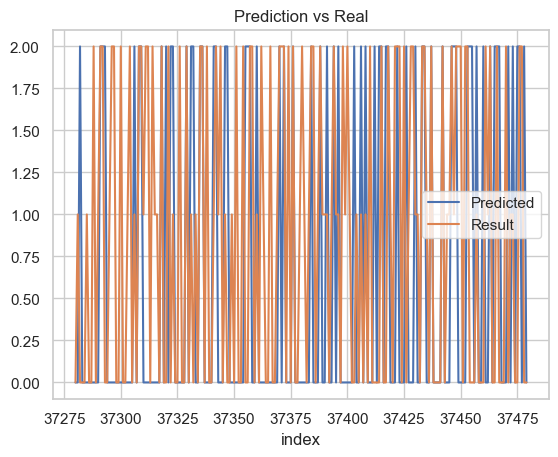

In [259]:
import matplotlib.pyplot as plt
result_subset = compare_result.tail(200)
plt.figure(figsize=(10,10))
result_subset.plot(x='index', y=['Predicted', 'Result'], kind='line')
plt.title("Prediction vs Real")
plt.show()

In [260]:
# 获取预测的概率值
probabilities = svm.predict_proba(xTe)

# 获取预测的 Top-2 类别
top2_pred = np.argsort(probabilities, axis=1)[:, -2:][:, ::-1]  # 获取 Top-2 类别，并按概率降序排列

# 创建 DataFrame 用于组织数据
df = pd.DataFrame({
    'True Label': np.ravel(yTe.to_numpy()),
    'Top-1 Prediction': np.argmax(probabilities, axis=1),  # Top-1 类别
    'Top-2 Prediction 1': top2_pred[:, 0],  # Top-2 第一个预测
    'Top-2 Prediction 2': top2_pred[:, 1]   # Top-2 第二个预测
})

# 计算 Top-1 Hit 和 Top-2 Hit
df['Top-1 Hit'] = df['True Label'] == df['Top-1 Prediction']
df['Top-2 Hit'] = df.apply(lambda row: row['True Label'] in [row['Top-2 Prediction 1'], row['Top-2 Prediction 2']], axis=1)

# 计算 Top-1 和 Top-2 的准确率
top1_accuracy = df['Top-1 Hit'].mean()
top2_accuracy = df['Top-2 Hit'].mean()

print(f"Top-1 Accuracy: {top1_accuracy:.4f}")
print(f"Top-2 Accuracy: {top2_accuracy:.4f}")

Top-1 Accuracy: 0.4856
Top-2 Accuracy: 0.7530


In [261]:
import time
local_time = time.strftime("%Y_%m_%d_%H_%M_%S", time.localtime())
dump(svm, f'./sklearn_svm_{local_time}.joblib')

['./sklearn_svm_2025_02_22_15_23_18.joblib']

**3.5.2** Penalty Tuning

In [262]:
svm_params = {'C':[0.001,0.01,0.10,0.2,0.3,0.5,0.7,0.8]}

# svm_randsearch = RandomizedSearchCV(estimator=SVC(max_iter=100000),
#                                          param_distributions=svm_params,
svm_randsearch = GridSearchCV(estimator=SVC(max_iter=100000),
                                         param_grid=svm_params,
                                         scoring='accuracy',
                                         verbose=2,
                                         cv=5,
                                         n_jobs=-1)

svm_rand_results = svm_randsearch.fit(xTr, yTr.values.ravel())
print("Best: %f using %s" % (svm_rand_results.best_score_, svm_rand_results.best_params_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best: 0.464321 using {'C': 0.5}


In [263]:
svm_rs = svm_rand_results.best_estimator_

In [264]:
# training score
accuracy_score(yTr.Result.values, svm_rs.predict(xTr))

0.4731997834325934

In [265]:
# testing score
accuracy_score(yTe.Result.values, svm_rs.predict(xTe))

0.4856115107913669

In [266]:
import time
local_time = time.strftime("%Y_%m_%d_%H_%M_%S", time.localtime())
dump(svm_rs, f'./sklearn_svm_randsearch_{local_time}.joblib')

['./sklearn_svm_randsearch_2025_02_22_15_28_37.joblib']

### improve model

In [267]:
from sklearn.neural_network._stochastic_optimizers import AdamOptimizer
from sklearn.base import clone
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import copy

class ImprovedMLPClassifier(MLPClassifier):
    def __init__(self, **kwargs):
        # Remove dropout if it's in kwargs since MLPClassifier doesn't support it
        if 'dropout' in kwargs:
            del kwargs['dropout']
        super().__init__(**kwargs)
        self.train_scores_ = []
        self.val_scores_ = []  # Changed from validation_scores_ to val_scores_
        self.loss_curve_ = []
        self.best_val_score_ = -np.inf
        self.best_model_params_ = None  # Store best model parameters instead of the whole model
        self.iter_ = 0
        
    def _partial_fit(self, X, y, *args, **kwargs):
        if self.early_stopping:
            # Split validation set
            n_samples = X.shape[0]
            n_val = int(n_samples * self.validation_fraction)
            indices = np.random.permutation(n_samples)
            val_idx = indices[:n_val]
            train_idx = indices[n_val:]
            
            X_val = X[val_idx]
            y_val = y[val_idx]
            X_train = X[train_idx]
            y_train = y[train_idx]
            
            # Train
            super()._partial_fit(X_train, y_train, *args, **kwargs)
            
            # Record scores
            train_score = accuracy_score(y_train, self.predict(X_train))
            val_score = accuracy_score(y_val, self.predict(X_val))
            
            self.train_scores_.append(train_score)
            self.val_scores_.append(val_score)
            
            # Save best model parameters
            if val_score > self.best_val_score_:
                self.best_val_score_ = val_score
                self.best_model_params_ = {
                    'coefs_': [coef.copy() for coef in self.coefs_],
                    'intercepts_': [intercept.copy() for intercept in self.intercepts_]
                }
            
            self.iter_ += 1
            if self.verbose and self.iter_ % 10 == 0:
                print(f"Epoch {len(self.train_scores_)}")
                print(f"Training Score: {train_score:.4f}")
                print(f"Validation Score: {val_score:.4f}")
                print(f"Best Validation Score: {self.best_val_score_:.4f}")
                if hasattr(self, 'loss_curve_') and len(self.loss_curve_) > 0:
                    print(f"Loss: {self.loss_curve_[-1]:.4f}")
                print("-" * 50)
        else:
            super()._partial_fit(X, y, *args, **kwargs)
            
        return self
    
    def fit(self, X, y):
        # Initialize loss curve if it doesn't exist
        if not hasattr(self, 'loss_curve_'):
            self.loss_curve_ = []
            
        super().fit(X, y)
        
        # Restore best model parameters if available
        if self.early_stopping and self.best_model_params_ is not None:
            self.coefs_ = self.best_model_params_['coefs_']
            self.intercepts_ = self.best_model_params_['intercepts_']
        return self

def train_and_evaluate_model(X_train, y_train, X_test, y_test, random_state=13):
    # Create and train model with better hyperparameters
    model = ImprovedMLPClassifier(
        hidden_layer_sizes=(64, 32),  # Smaller network
        activation='relu',
        batch_size=32,  # Smaller batch size
        max_iter=1000,
        learning_rate_init=0.0001,
        early_stopping=False,
        validation_fraction=0.2,
        alpha=0.5,  # Stronger regularization
        verbose=True,
        tol=1e-4,
        random_state=random_state,
        learning_rate='adaptive',
        n_iter_no_change=100
    )
    
    # Split training data for validation
    X_train_final, X_val, y_train_final, y_val = train_test_split(
        X_train, y_train, test_size=0.2, random_state=random_state
    )
    
    # Train model
    model.fit(X_train_final, y_train_final)
    
    # Evaluate
    train_score = accuracy_score(y_train_final, model.predict(X_train_final))
    val_score = accuracy_score(y_val, model.predict(X_val))
    test_score = accuracy_score(y_test, model.predict(X_test))
    
    print(f"\nFinal Scores:")
    print(f"Training Accuracy: {train_score:.4f}")
    print(f"Validation Accuracy: {val_score:.4f}")
    print(f"Test Accuracy: {test_score:.4f}")
    
    return model

def plot_learning_curves(model):
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(12, 4))
    
    # Learning curves
    plt.subplot(1, 2, 1)
    plt.plot(model.train_scores_, label='Training Score')
    plt.plot(model.validation_scores_, label='Validation Score')
    plt.xlabel('Iterations')
    plt.ylabel('Score')
    plt.title('Learning Curves')
    plt.legend()
    plt.grid(True)
    
    # Loss curve
    if hasattr(model, 'loss_curve_') and len(model.loss_curve_) > 0:
        plt.subplot(1, 2, 2)
        plt.plot(model.loss_curve_)
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.title('Loss Curve')
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# 使用示例
def run_experiment(xTr, yTr, test_size=0.2, random_state=42):
    # 准备数据
    X_train, X_test, y_train, y_test = train_test_split(
        xTr, yTr.values.ravel(), 
        test_size=test_size, 
        random_state=random_state
    )
    
    # 训练和评估模型
    model = train_and_evaluate_model(X_train, y_train, X_test, y_test)
    
    # 绘制学习曲线
    # plot_learning_curves(model)
    
    return model

# 运行完整实验
model = run_experiment(xTr, yTr)

# # 或者分步执行
# X_train, X_test, y_train, y_test = train_test_split(xTr, yTr.values.ravel(), test_size=0.2, random_state=13)
# model = train_and_evaluate_model(X_train, y_train, X_test, y_test)
# plot_learning_curves(model)

Iteration 1, loss = 2.23004016
Iteration 2, loss = 1.88416728
Iteration 3, loss = 1.67081917
Iteration 4, loss = 1.52447355
Iteration 5, loss = 1.42428099
Iteration 6, loss = 1.35376664
Iteration 7, loss = 1.30410095
Iteration 8, loss = 1.26818603
Iteration 9, loss = 1.24099585
Iteration 10, loss = 1.22030539
Iteration 11, loss = 1.20369367
Iteration 12, loss = 1.19015100
Iteration 13, loss = 1.17950017
Iteration 14, loss = 1.17028645
Iteration 15, loss = 1.16247908
Iteration 16, loss = 1.15574750
Iteration 17, loss = 1.14995249
Iteration 18, loss = 1.14499539
Iteration 19, loss = 1.14047149
Iteration 20, loss = 1.13651182
Iteration 21, loss = 1.13277216
Iteration 22, loss = 1.13008627
Iteration 23, loss = 1.12652041
Iteration 24, loss = 1.12431857
Iteration 25, loss = 1.12189819
Iteration 26, loss = 1.11955245
Iteration 27, loss = 1.11731036
Iteration 28, loss = 1.11524965
Iteration 29, loss = 1.11356029
Iteration 30, loss = 1.11129735
Iteration 31, loss = 1.10997748
Iteration 32, los

### 3.6 Simple Neural Network ####

In [268]:
from sklearn.neural_network._stochastic_optimizers import AdamOptimizer
from sklearn.base import clone
from sklearn.neural_network import MLPClassifier

class MonitorMLPClassifier(MLPClassifier):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.train_scores_ = []
        self.val_scores_ = []
        self.loss_curve_ = []
        self.iter_ = 0
    
    def _partial_fit(self, X, y, *args, **kwargs):
        if self.early_stopping:
            # 分割验证集
            n_samples = X.shape[0]
            n_val = int(n_samples * self.validation_fraction)
            X_val = X[-n_val:]
            y_val = y[-n_val:]
            X_train = X[:-n_val]
            y_train = y[:-n_val]
            
            # 训练
            super()._partial_fit(X_train, y_train, *args, **kwargs)
            
            # 记录分数
            train_score = accuracy_score(y_train, self.predict(X_train))
            val_score = accuracy_score(y_val, self.predict(X_val))
            
            self.train_scores_.append(train_score)
            self.val_scores_.append(val_score)
            self.iter_ += 1
            if self.verbose & self.iter_ % 10 == 0:
                print(f"Epoch {len(self.train_scores_)}")
                print(f"Training Score: {train_score:.4f}")
                print(f"Validation Score: {val_score:.4f}")
                print(f"Loss: {self.loss_curve_[-1]:.4f}")
                print("-" * 50)
        else:
            super()._partial_fit(X, y, *args, **kwargs)
            
        return self


# 使用示例
monitor_clf = MonitorMLPClassifier(
    hidden_layer_sizes=(256,128,64),
    activation='relu',
    batch_size=512,
    max_iter=10000,
    learning_rate_init=1e-4,
    early_stopping=False,
    alpha=3e-1,
    verbose=True,
    tol=1e-4,
    random_state=13,
    learning_rate='adaptive',
    n_iter_no_change=10,
    validation_fraction=0.2
).fit(xTr, yTr.values.ravel())

# # 绘制训练过程
# import matplotlib.pyplot as plt
# 
# plt.figure(figsize=(10, 6))
# plt.plot(monitor_clf.train_scores_, label='Training Score')
# plt.plot(monitor_clf.validation_scores_, label='Validation Score')
# plt.xlabel('Iterations')
# plt.ylabel('Score')
# plt.title('Training and Validation Scores Over Time')
# plt.legend()
# plt.grid(True)
# plt.show()

Iteration 1, loss = 1.26226835
Iteration 2, loss = 1.24643524
Iteration 3, loss = 1.23740618
Iteration 4, loss = 1.23191124
Iteration 5, loss = 1.22674926
Iteration 6, loss = 1.22227616
Iteration 7, loss = 1.21755024
Iteration 8, loss = 1.21374954
Iteration 9, loss = 1.20986408
Iteration 10, loss = 1.20557792
Iteration 11, loss = 1.20135890
Iteration 12, loss = 1.19871070
Iteration 13, loss = 1.19418788
Iteration 14, loss = 1.19082283
Iteration 15, loss = 1.18683463
Iteration 16, loss = 1.18355898
Iteration 17, loss = 1.18023721
Iteration 18, loss = 1.17698199
Iteration 19, loss = 1.17447389
Iteration 20, loss = 1.17062485
Iteration 21, loss = 1.16797148
Iteration 22, loss = 1.16497324
Iteration 23, loss = 1.16324125
Iteration 24, loss = 1.15977549
Iteration 25, loss = 1.15621233
Iteration 26, loss = 1.15261513
Iteration 27, loss = 1.14976699
Iteration 28, loss = 1.14691001
Iteration 29, loss = 1.14585648
Iteration 30, loss = 1.14196188
Iteration 31, loss = 1.14086240
Iteration 32, los

In [269]:
# training score
accuracy_score(yTr.Result.values, monitor_clf.predict(xTr))


1.0

In [270]:
# testing score
accuracy_score(yTe.Result.values, monitor_clf.predict(xTe))

0.39928057553956836

In [271]:
# from sklearn.neural_network import MLPClassifier
# mlp = MLPClassifier(hidden_layer_sizes=(512,128,32),
#                     activation='relu',
#                     batch_size=512,
#                     max_iter=10000,
#                     learning_rate_init=1e-4,
#                     early_stopping=True,
#                     alpha=1e-3,
#                    ).fit(xTr, yTr.values.ravel())
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(256,128,32),
                    activation='relu',
                    batch_size=512,
                    max_iter=10000,
                    learning_rate_init=1e-4,
                    early_stopping=False,
                    alpha=8e-1,
                    verbose=True,
                    tol=1e-4,
                    random_state=13,
                    learning_rate='adaptive',
                    n_iter_no_change=10
                   ).fit(xTr, yTr.values.ravel())
mlp

Iteration 1, loss = 1.54953198
Iteration 2, loss = 1.51060120
Iteration 3, loss = 1.49619808
Iteration 4, loss = 1.48378816
Iteration 5, loss = 1.47342427
Iteration 6, loss = 1.46416645
Iteration 7, loss = 1.45493124
Iteration 8, loss = 1.44647150
Iteration 9, loss = 1.43831666
Iteration 10, loss = 1.42997180
Iteration 11, loss = 1.42219756
Iteration 12, loss = 1.41463331
Iteration 13, loss = 1.40760305
Iteration 14, loss = 1.40018938
Iteration 15, loss = 1.39299715
Iteration 16, loss = 1.38602176
Iteration 17, loss = 1.37871981
Iteration 18, loss = 1.37241817
Iteration 19, loss = 1.36680379
Iteration 20, loss = 1.35985006
Iteration 21, loss = 1.35347471
Iteration 22, loss = 1.34755942
Iteration 23, loss = 1.34113589
Iteration 24, loss = 1.33491237
Iteration 25, loss = 1.32904449
Iteration 26, loss = 1.32315332
Iteration 27, loss = 1.31853805
Iteration 28, loss = 1.31343614
Iteration 29, loss = 1.30875695
Iteration 30, loss = 1.30229315
Iteration 31, loss = 1.29724318
Iteration 32, los

MLPClassifier(alpha=0.8, batch_size=512, hidden_layer_sizes=(256, 128, 32),
              learning_rate='adaptive', learning_rate_init=0.0001,
              max_iter=10000, random_state=13, verbose=True)

In [272]:
# training score
accuracy_score(yTr.Result.values, mlp.predict(xTr))

1.0

In [273]:
# testing score
accuracy_score(yTe.Result.values, mlp.predict(xTe))

0.4136690647482014

In [274]:
# 获取预测概率
probs = mlp.predict_proba(xTe)

# 初始化计数器
top1_correct = 0
top2_correct = 0

# 遍历每个样本的预测概率
for i, prob in enumerate(probs):
    # 获取 Top-1 类别的索引（最大概率的索引）
    top1_idx = np.argmax(prob)
    
    # 获取 Top-2 概率的索引（最大和第二大概率的索引）e
    top2_idx = np.argsort(prob)[-2:][::-1]
    
    # 判断 Top-1 是否正确
    if yTe.iloc[i].item() == top1_idx:
        top1_correct += 1
    
    # 判断 Top-2 是否包含真实标签
    if yTe.iloc[i].item() in top2_idx:
        top2_correct += 1

# 计算 Top-1 和 Top-2 正确率
top1_accuracy = top1_correct / len(yTe)
top2_accuracy = top2_correct / len(yTe)

print(f"Top-1 Accuracy: {top1_accuracy * 100:.2f}%")
print(f"Top-2 Accuracy: {top2_accuracy * 100:.2f}%")

Top-1 Accuracy: 41.37%
Top-2 Accuracy: 68.82%


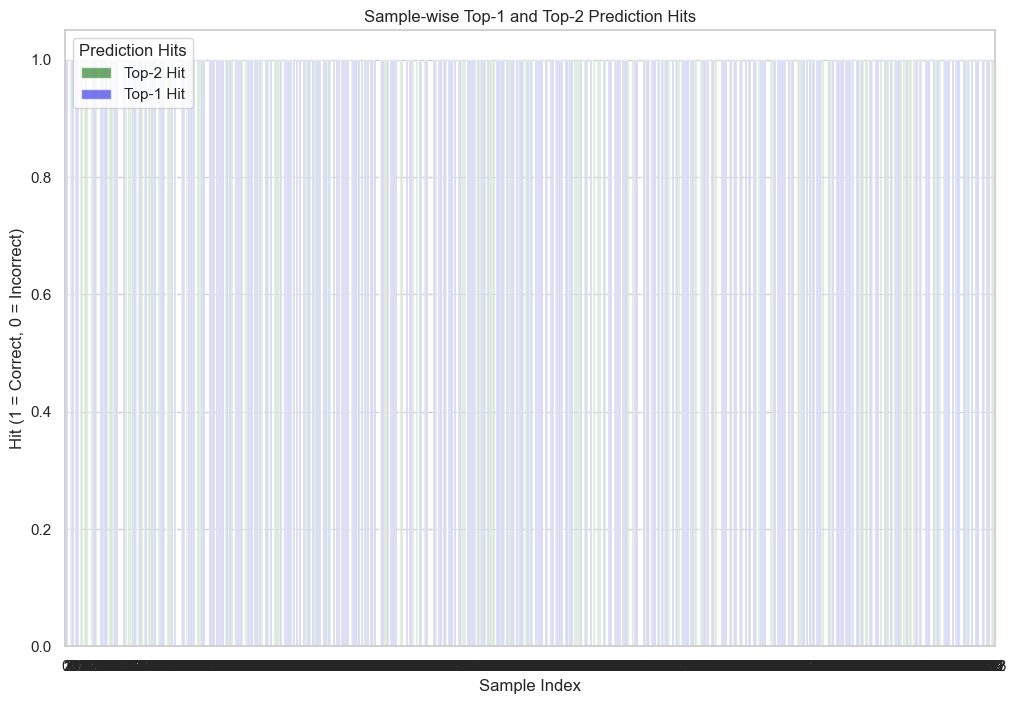

In [275]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 假设这是你的概率数组 (345, 3)
probabilities = probs

# 假设这是你的真实标签数组 (345,)
true_labels = np.ravel(yTe.to_numpy())

# 计算每个样本的 Top-1 和 Top-2 预测类别
top1_pred = np.argmax(probabilities, axis=1)
top2_pred = np.argsort(probabilities, axis=1)[:, -2:][:, ::-1]  # 取前两名类别，并从大到小排序

# 创建一个 DataFrame 来组织数据
import pandas as pd
df = pd.DataFrame({
    'True Label': true_labels,
    'Top-1 Prediction': top1_pred,
    'Top-2 Prediction 1': top2_pred[:, 0],  # Top-2 第一个预测
    'Top-2 Prediction 2': top2_pred[:, 1]   # Top-2 第二个预测
})

# 判断 Top-1 和 Top-2 是否命中
df['Top-1 Hit'] = df['True Label'] == df['Top-1 Prediction']
# df['Top-2 Hit'] = df['True Label'].isin(df[['Top-2 Prediction 1', 'Top-2 Prediction 2']].values)

df['Top-2 Hit'] = df.apply(lambda row: row['True Label'] in [row['Top-2 Prediction 1'], row['Top-2 Prediction 2']], axis=1)
# 可视化每个样本的 Top-1 和 Top-2 预测情况
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# 通过条形图展示每个样本的 Top-1 和 Top-2 命中情况
sns.barplot(x=df.index, y=df['Top-2 Hit'], color='green', alpha=0.6, label='Top-2 Hit', errorbar=None)
sns.barplot(x=df.index, y=df['Top-1 Hit'], color='blue', alpha=0.6, label='Top-1 Hit', errorbar=None)
# 绘制 Top-2 未命中的情况（橙色）
# sns.barplot(x=df.index, y=~df['Top-2 Hit'], color='orange', alpha=0.6, label='Top-2 Missed', errorbar=None)

plt.title("Sample-wise Top-1 and Top-2 Prediction Hits")
plt.xlabel("Sample Index")
plt.ylabel("Hit (1 = Correct, 0 = Incorrect)")
plt.legend(title="Prediction Hits")
plt.show()


In [276]:
xTr

,B365H,B365D,B365A,AHh,B365AHH,B365AHA,HomeTeamELO,AwayTeamELO,balance_val,Div 0,...,Month,Sin_Month,Cos_Month,Sin_Day,Cos_Day,Last Match Result,HomeWinStreak,AwayWinStreak,HomeWinsToDate,AwayWinsToDate
27411,-0.903763,4.972708,4.478733,-2.383909,0.055421,-0.136397,2.953076,-0.485696,-2,0,...,2,0.866025,5.000000e-01,0.635432,0.772157,0,0,0,0.0,0.0
27412,0.124052,-0.629976,-0.580306,0.335049,1.178939,-2.503302,-1.038166,0.322849,0,0,...,2,0.866025,5.000000e-01,0.635432,0.772157,2,0,0,0.0,0.0
27413,-0.224079,-0.797220,-0.327810,0.032942,0.668249,-0.781916,-1.102604,-1.117227,-1,0,...,2,0.866025,5.000000e-01,0.648630,0.761104,0,0,0,0.0,0.0
27414,-0.456166,-0.379109,-0.206126,-0.269164,0.566111,-0.674330,0.010755,-0.577543,-1,0,...,2,0.866025,5.000000e-01,0.648630,0.761104,3,0,0,0.0,0.0
27415,-0.224079,-0.713598,-0.358231,0.032942,0.974663,-1.104676,-1.501843,-1.628514,-1,0,...,2,0.866025,5.000000e-01,0.648630,0.761104,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36641,0.068793,-0.797220,-0.525548,0.335049,1.076801,-1.212263,0.517487,0.705148,0,0,...,3,1.000000,6.123234e-17,0.999250,0.038722,0,0,0,1.0,0.0
36642,-0.179872,-0.546354,-0.425158,0.335049,-1.272373,1.262229,-0.455233,0.076339,0,0,...,3,1.000000,6.123234e-17,0.999250,0.038722,0,1,1,1.0,1.0
36643,-0.621943,0.039001,0.219771,-0.571271,-1.272373,1.262229,0.015415,-0.957132,-1,0,...,3,1.000000,6.123234e-17,0.999769,0.021516,0,0,0,1.0,1.0
36644,-0.373278,-0.379109,-0.266968,0.032942,-0.965959,0.939469,-0.958320,-0.934277,-1,0,...,3,1.000000,6.123234e-17,0.999769,0.021516,0,0,0,2.0,0.0


In [277]:
yTr

,Result
27411,2
27412,0
27413,2
27414,0
27415,0
...,...
36641,0
36642,0
36643,2
36644,0


In [278]:
xTe

,B365H,B365D,B365A,AHh,B365AHH,B365AHA,HomeTeamELO,AwayTeamELO,balance_val,Div 0,...,Month,Sin_Month,Cos_Month,Sin_Day,Cos_Day,Last Match Result,HomeWinStreak,AwayWinStreak,HomeWinsToDate,AwayWinsToDate
36646,-0.218553,-0.295487,-0.479916,0.335049,-1.374511,1.369816,-0.659458,-0.313288,0,1,...,4,0.866025,-0.5,0.997917,-0.064508,1,0,0,1.0,1.0
36647,0.068793,-0.981189,-0.449495,0.335049,0.668249,-0.781916,-1.196194,-0.537726,0,0,...,4,0.866025,-0.5,0.997917,-0.064508,2,0,0,0.0,0.0
36648,-0.842979,1.627822,2.349252,-1.779696,-0.455269,0.401536,0.601213,-1.785167,-2,0,...,4,0.866025,-0.5,0.997917,-0.064508,1,1,1,1.0,1.0
36649,-0.732461,0.231332,0.828194,-1.175484,0.872525,-0.997089,0.818264,-1.022344,-1,0,...,4,0.866025,-0.5,0.997917,-0.064508,3,1,1,2.0,2.0
36650,-0.152242,-0.713598,-0.419074,0.032942,1.485353,-2.718475,-0.427217,-1.026273,-1,0,...,4,0.866025,-0.5,0.997917,-0.064508,2,0,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37475,-0.041725,-0.671787,-0.479916,0.335049,-0.250993,0.186363,-0.394834,0.772790,0,0,...,8,-0.866025,-0.5,-0.717677,-0.696376,0,0,0,4.0,5.0
37476,-0.179872,-0.253676,-0.504253,0.335049,-0.965959,0.939469,0.759766,0.529466,0,0,...,8,-0.866025,-0.5,-0.717677,-0.696376,2,0,2,4.0,5.0
37477,-0.539055,-0.462732,0.143718,-0.269164,-1.374511,1.369816,-0.265879,-0.613068,-1,0,...,8,-0.866025,-0.5,-0.717677,-0.696376,0,0,0,3.0,8.0
37478,0.676641,-0.546354,-0.708075,0.939261,-0.659545,0.616709,-1.227591,-0.255831,1,0,...,8,-0.866025,-0.5,-0.717677,-0.696376,0,0,2,4.0,5.0


In [279]:
yTe

,Result
36646,2
36647,1
36648,0
36649,2
36650,1
...,...
37475,0
37476,2
37477,2
37478,0


In [280]:
predict_val = mlp.predict(xTe)
series_pre = pd.Series(predict_val, name='Predicted')
compare_result = pd.concat([series_pre, yTe.reset_index()], axis=1)
compare_result

,Predicted,index,Result
0,2,36646,2
1,1,36647,1
2,2,36648,0
3,2,36649,2
4,2,36650,1
...,...,...,...
829,2,37475,0
830,1,37476,2
831,1,37477,2
832,2,37478,0


<Figure size 2000x1000 with 0 Axes>

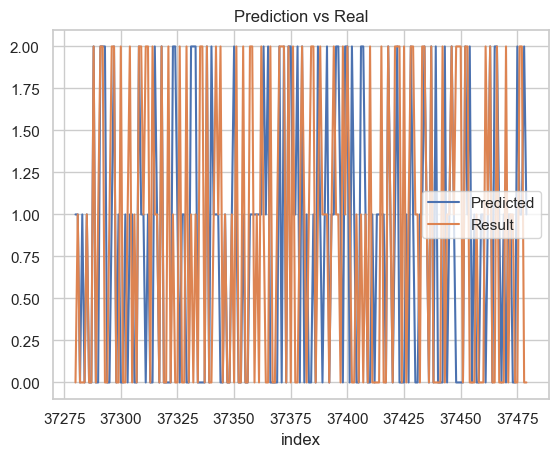

In [281]:
import matplotlib.pyplot as plt
result_subset = compare_result.tail(200)
plt.figure(figsize=(20,10))
result_subset.plot(x='index', y=['Predicted', 'Result'], kind='line')
plt.title("Prediction vs Real")
plt.show()

In [282]:
# xTr = xTr.drop(columns=['pad1', 'pad2', 'pad3'])
# xTe = xTe.drop(columns=['pad1', 'pad2', 'pad3'])

### 保存模型

In [283]:
import time
local_time = time.strftime("%Y_%m_%d_%H_%M_%S", time.localtime())
dump(mlp, f'./sklearn_mlp_{local_time}.joblib')

['./sklearn_mlp_2025_02_22_15_38_57.joblib']

In [284]:
# ### 加载模型
# # model_name = 'sklearn_mlp_' + local_time + '.joblib'
# model_name = './' + 'sklearn_mlp_2025_01_21_22_41_15.joblib'
# mlp = load(model_name)

In [285]:
# model_name = './' + 'sklearn_mlp_2025_01_31_09_00_15.joblib'
# mlp = load(model_name)
# predict_val = mlp.predict(xTe)
# series_pre = pd.Series(predict_val, name='Predicted')
# compare_result = pd.concat([series_pre, yTe.reset_index()], axis=1)
# compare_result

In [286]:
# testing score
# accuracy_score(yTe.Result.values, mlp.predict(xTe))

In [287]:
# import matplotlib.pyplot as plt
# result_subset = compare_result.tail(200)
# plt.figure(figsize=(10,10))
# result_subset.plot(x='index', y=['Predicted', 'Result'], kind='line')
# plt.title("Prediction vs Real")
# plt.show()

### 自定义的pytorch模型结构

Epoch [1/1000], Train Loss: 0.1151, Validation Loss: 0.1135
Epoch [2/1000], Train Loss: 0.1136, Validation Loss: 0.1125
Epoch [3/1000], Train Loss: 0.1129, Validation Loss: 0.1118
Epoch [4/1000], Train Loss: 0.1125, Validation Loss: 0.1112
Epoch [5/1000], Train Loss: 0.1124, Validation Loss: 0.1107
Epoch [6/1000], Train Loss: 0.1124, Validation Loss: 0.1104
Epoch [7/1000], Train Loss: 0.1117, Validation Loss: 0.1100
Epoch [8/1000], Train Loss: 0.1113, Validation Loss: 0.1098
Epoch [9/1000], Train Loss: 0.1114, Validation Loss: 0.1095
Epoch [10/1000], Train Loss: 0.1112, Validation Loss: 0.1093
Epoch [11/1000], Train Loss: 0.1110, Validation Loss: 0.1091
Epoch [12/1000], Train Loss: 0.1111, Validation Loss: 0.1090
Epoch [13/1000], Train Loss: 0.1109, Validation Loss: 0.1089
Epoch [14/1000], Train Loss: 0.1110, Validation Loss: 0.1088
Epoch [15/1000], Train Loss: 0.1110, Validation Loss: 0.1088
Epoch [16/1000], Train Loss: 0.1111, Validation Loss: 0.1087
Epoch [17/1000], Train Loss: 0.11

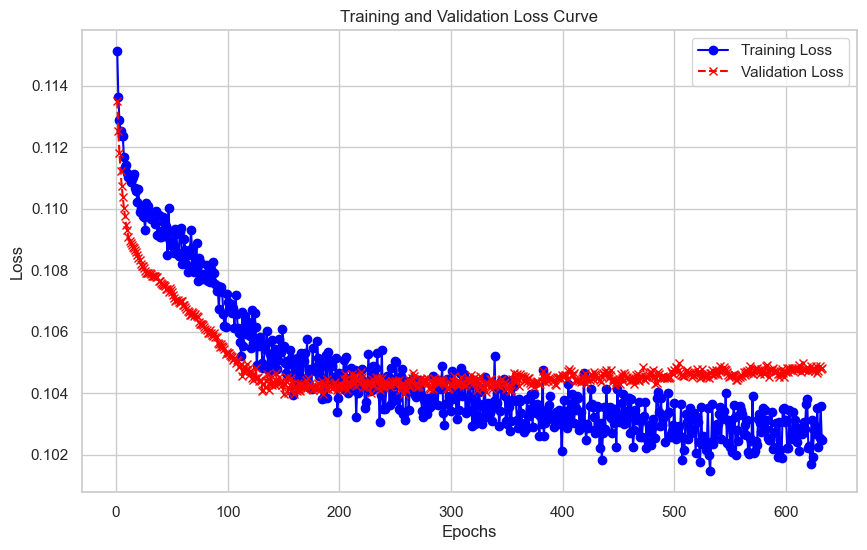

Top-1 Accuracy: 0.4772
Top-2 Accuracy: 0.7710
Top-1 train: 0.5040
Top-2 train: 0.7894


In [293]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.init as init

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 自定义的 top-k loss
def top_k_loss(y_true, y_pred, top_k=2, top_1_weight=1.0, top_2_weight=0.5, misclassification_weight=3):
    """
    y_true: 真实标签，形状 [batch_size]
    y_pred: 模型预测的 logits，形状 [batch_size, num_classes]
    top_k: top-k 的 k 值
    top_1_weight: top-1 命中的权重（越高越小）
    top_2_weight: top-2 命中的权重（越高越小）
    misclassification_weight: 未命中的样本的损失权重（越高越大）
    """
    # # 获取 top-k 的类别索引和对应的概率值
    # top_k_values, top_k_indices = torch.topk(y_pred, top_k, dim=1, largest=True, sorted=True)
    # 
    # # 计算命中情况：top-1 和 top-2
    # top_1_correct = (top_k_indices[:, 0] == y_true).float()  # top-1 命中
    # top_2_correct = ((top_k_indices[:, 0] == y_true) | (top_k_indices[:, 1] == y_true)).float()  # top-2 命中
    # 
    # # 计算损失
    # # top-1 命中损失为 0，top-2 命中损失较小，未命中损失较大
    # loss = torch.where(top_1_correct == 1.0, torch.tensor(top_1_weight), torch.tensor(top_2_weight))
    # loss = torch.where(top_2_correct == 1.0, loss, torch.tensor(misclassification_weight))
    # 
    # return loss.mean()

    # # 获取 top-k 预测的类别索引
    # top_k_values, top_k_indices = torch.topk(y_pred, top_k, dim=1, largest=True, sorted=True)
    # # print('y_pred: ', y_pred)
    # # print('y_true', y_true)
    # # print('top_k_values: ', top_k_values)
    # # print('top_k_indices: ', top_k_indices)
    # 
    # # 计算 top-1 和 top-2 命中情况
    # top_1_correct = (top_k_indices[:, 0] == y_true).float()  # top-1 命中
    # top_2_correct = ((top_k_indices[:, 0] == y_true) | (top_k_indices[:, 1] == y_true)).float()  # top-2 命中
    # 
    # # **关键修改：让损失函数与 y_pred 相关，并使用 -log 计算损失**
    # # y_pred_prob = torch.softmax(y_pred, dim=1)  # 转换为概率分布
    # y_pred_confidence = torch.gather(y_pred, 1, y_true.unsqueeze(1)).squeeze(1)  # 获取真实类别的置信度
    # 
    # # **修改损失计算方式**
    # loss = -torch.log(y_pred_confidence + 1e-9) * (
    #     top_1_correct * top_1_weight +
    #     (1 - top_1_correct) * top_2_correct * top_2_weight +
    #     (1 - top_2_correct) * misclassification_weight
    # )
    # 
    # return loss.mean()
    
    """
    结合 CrossEntropyLoss 和自定义权重的 Top-K 损失
    """
    # 计算 CrossEntropyLoss
    # ce_loss = F.cross_entropy(y_pred, y_true, reduction='none')  # [batch_size]
    # print('y_true', y_true) 
    # print(f'y_pred {torch.round(y_pred * 10) / 10}')
    # # 获取 top-k 预测的类别索引
    # top_k_values, top_k_indices = torch.topk(y_pred, top_k, dim=1, largest=True, sorted=True)
    # 
    # # 计算 top-1 和 top-2 命中情况
    # top_1_correct = (top_k_indices[:, 0] == y_true).float()
    # top_2_correct = ((top_k_indices[:, 0] == y_true) | (top_k_indices[:, 1] == y_true)).float()
    # 
    # # 应用不同的权重
    # weight = (
    #     top_1_correct * top_1_weight +
    #     (1 - top_1_correct) * top_2_correct * top_2_weight +
    #     (1 - top_2_correct) * misclassification_weight
    # )

    # return (ce_loss * weight).mean()
    # loss = F.l1_loss(y_pred, y_true, reduction='mean')
    loss = F.smooth_l1_loss(y_pred, y_true, beta=1.0)
    # return ce_loss.mean()
    return loss

# 定义 MLP 模型（与之前类似）
class MLPModel(nn.Module):
    def __init__(self, input_dim, hidden_layers=[256, 128, 32], output_dim=3, dropout_prob=0.3):
        super(MLPModel, self).__init__()

        layers = []
        in_dim = input_dim
        for hidden_dim in hidden_layers:
            layers.append(nn.Linear(in_dim, hidden_dim))
            # self.initialize_weights(layers[-1], method='kaiming')  # 使用Kaiming初始化
            # layers.append(nn.BatchNorm1d(hidden_dim))  # 添加 BatchNorm 层
            layers.append(nn.ELU())
            layers.append(nn.Dropout(dropout_prob))  # 添加 Dropout 层
            in_dim = hidden_dim
            
        layers.append(nn.Linear(in_dim, output_dim))  # 输出层
        # self.initialize_weights(layers[-2], method='kaiming')  # 输出层初始化
        layers.append(nn.Softmax(dim=1))  # 归一化为概率分布
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)  # 将 softmax 归一化到 (0,2) 范围
    
    def initialize_weights(self, layer, method='kaiming'):
        """
        初始化网络的权重
        :param layer: 当前层
        :param method: 初始化方法 ('kaiming' 或 'xavier')
        """
        if isinstance(layer, nn.Linear):
            if method == 'kaiming':
                init.kaiming_normal_(layer.weight, mode='fan_in', nonlinearity='relu')  # for ELU/Relu
            elif method == 'xavier':
                init.xavier_normal_(layer.weight)  # for tanh or sigmoid activations
            if layer.bias is not None:
                init.zeros_(layer.bias)  # 初始化偏置为0
        elif isinstance(layer, nn.Conv1d):
            if method == 'kaiming':
                init.kaiming_normal_(layer.weight, mode='fan_in', nonlinearity='relu')
            elif method == 'xavier':
                init.xavier_normal_(layer.weight)
            if layer.bias is not None:
                init.zeros_(layer.bias)  # Conv层的偏置初始化为0

# 定义训练过程
def train_model(model, x_train, y_train, x_val, y_val, epochs=100, batch_size=512, 
                learning_rate=1e-4, early_stopping=False, patience=10):
    # 创建优化器
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = top_k_loss  # 使用自定义的 top-k loss

    # 批次处理数据
    dataset = torch.utils.data.TensorDataset(x_train, y_train)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

    # 初始化早期停止相关变量
    best_train_loss = 100
    epochs_without_improvement = 0
    best_model_weights = None

    # 用于记录训练损失和验证损失
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        # 训练阶段
        model.train()
        running_train_loss = 0.0
        for batch_idx, (inputs, labels) in enumerate(dataloader):
            optimizer.zero_grad()

            # 前向传播
            outputs = model(inputs)
            loss = criterion(labels, outputs)  # 计算损失
            running_train_loss += loss.item()

            # 反向传播和优化
            loss.backward()
            optimizer.step()

        # 计算训练集上的平均损失
        train_loss = running_train_loss / len(dataloader)

        # 计算验证集上的损失
        model.eval()
        with torch.no_grad():
            val_outputs = model(x_val)
            val_loss = criterion(y_val, val_outputs)

        # 保存训练损失和验证损失
        train_losses.append(train_loss)
        
        val_losses.append(val_loss.item())

        # 打印当前的训练损失和验证损失
        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

        # 早期停止：检查验证损失
        if early_stopping:
            if (best_train_loss - train_loss) - best_train_loss * 0.0001 > 0:
                best_train_loss = train_loss
                best_model_weights = model.state_dict()
                epochs_without_improvement = 0
            else:
                epochs_without_improvement += 1
                if epochs_without_improvement >= patience:
                    print("Early stopping triggered.")
                    break

    # 恢复最好的模型权重
    if early_stopping and best_model_weights:
        model.load_state_dict(best_model_weights)

    # 绘制训练损失和验证损失的曲线
    plot_loss_curve(train_losses, val_losses)

    return model

# 计算 top-k 准确率
def compute_top_k_accuracy(model, x_test, y_test, k=2):
    model.eval()
    with torch.no_grad():
        outputs = model(x_test)
        _, top_k_indices = torch.topk(outputs, k, dim=1, largest=True, sorted=True)
        correct_top_1 = torch.sum(top_k_indices[:, 0] == y_test).item()
        correct_top_2 = torch.sum((top_k_indices[:, 0] == y_test) | (top_k_indices[:, 1] == y_test)).item()
        top_1_accuracy = correct_top_1 / len(y_test)
        top_2_accuracy = correct_top_2 / len(y_test)
    return top_1_accuracy, top_2_accuracy

# 绘制训练和验证损失的曲线
def plot_loss_curve(train_losses, val_losses):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', color='blue', linestyle='-', marker='o')
    plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', color='red', linestyle='--', marker='x')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Curve')
    plt.legend()
    plt.grid(True)
    plt.show()


# 从 pandas 数据加载训练和验证数据
def load_data_from_pandas(x_train_pd, y_train_pd, x_val_pd, y_val_pd, num_classes=3):
    """
    将 pandas 数据加载为 torch 张量
    x_train_pd: pandas DataFrame, 训练数据
    y_train_pd: pandas Series, 训练标签
    x_val_pd: pandas DataFrame, 验证数据
    y_val_pd: pandas Series, 验证标签
    """
    # 将 pandas DataFrame 转换为 torch Tensor
    x_train = torch.tensor(x_train_pd.values.astype('float32'), dtype=torch.float32).to(device)
    x_val = torch.tensor(x_val_pd.values.astype('float32'), dtype=torch.float32).to(device)

    # 将 pandas Series 转换为 torch Tensor，并进行 one-hot 编码
    y_train = torch.tensor(y_train_pd.values.astype('int64'), dtype=torch.int64).reshape(-1).to(device)
    y_val = torch.tensor(y_val_pd.values.astype('int64'), dtype=torch.int64).reshape(-1).to(device)

    # 进行 one-hot 编码
    y_train_one_hot = torch.nn.functional.one_hot(y_train, num_classes=num_classes).float()
    y_val_one_hot = torch.nn.functional.one_hot(y_val, num_classes=num_classes).float()
    # y_train_one_hot = y_train
    # y_val_one_hot = y_val

    return x_train, y_train_one_hot, x_val, y_val_one_hot

# 假设我们有 pandas 数据
x_train_pd = xTr
y_train_pd = yTr
x_val_pd = xTe
y_val_pd = yTe

torch.manual_seed(42)

# 从 pandas 数据加载到 PyTorch 张量
x_train, y_train, x_val, y_val = load_data_from_pandas(x_train_pd, y_train_pd, x_val_pd, y_val_pd)

# 模型初始化
input_dim = xTr.shape[1]  # 特征维度
model = MLPModel(input_dim=input_dim, hidden_layers=[128, 64, 32, 16], output_dim=3, dropout_prob=0.6).to(device)

# 训练模型
trained_model = train_model(model, x_train, y_train, x_val, y_val, epochs=1000, batch_size=512, learning_rate=1e-4, early_stopping=True, patience=100)

# 评估模型的 top-1 和 top-2 准确率
y_val_fix = torch.argmax(y_val, dim=1)
top_1_accuracy, top_2_accuracy = compute_top_k_accuracy(trained_model, x_val, y_val_fix, k=2)
print(f"Top-1 Accuracy: {top_1_accuracy:.4f}")
print(f"Top-2 Accuracy: {top_2_accuracy:.4f}")
y_train_fix = torch.argmax(y_train, dim=1)
top_1_train, top_2_train = compute_top_k_accuracy(trained_model, x_train, y_train_fix, k=2)
print(f"Top-1 train: {top_1_train:.4f}")
print(f"Top-2 train: {top_2_train:.4f}")


In [289]:
local_time = time.strftime("%Y_%m_%d_%H_%M_%S", time.localtime())
torch.save(trained_model, f"./MLPModel_{local_time}.pt")
print(f"MLPModel_{local_time}.pt is saved.")

MLPModel_2025_02_22_15_39_56.pt is saved.


In [290]:
# eval_model = torch.load("./MLPModel_2025_02_05_12_59_59.pt")
# eval_model = torch.load("./MLPModel_2025_02_07_12_11_26.pt")
# eval_model = torch.load("./MLPModel_2025_02_10_13_55_41.pt")
eval_model = torch.load("./MLPModel_2025_02_12_08_56_50.pt")
print(eval_model)
# 评估模型的 top-1 和 top-2 准确率
y_val_fix = torch.argmax(y_val, dim=1)
top_1_accuracy, top_2_accuracy = compute_top_k_accuracy(eval_model, x_val, y_val_fix, k=2)
print(f"Top-1 Accuracy: {top_1_accuracy:.4f}")
print(f"Top-2 Accuracy: {top_2_accuracy:.4f}")
y_train_fix = torch.argmax(y_train, dim=1)
top_1_train, top_2_train = compute_top_k_accuracy(eval_model, x_train, y_train_fix, k=2)
print(f"Top-1 train: {top_1_train:.4f}")
print(f"Top-2 train: {top_2_train:.4f}")

MLPModel(
  (network): Sequential(
    (0): Linear(in_features=439, out_features=128, bias=True)
    (1): ELU(alpha=1.0)
    (2): Dropout(p=0.6, inplace=False)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ELU(alpha=1.0)
    (5): Dropout(p=0.6, inplace=False)
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): ELU(alpha=1.0)
    (8): Dropout(p=0.6, inplace=False)
    (9): Linear(in_features=32, out_features=16, bias=True)
    (10): ELU(alpha=1.0)
    (11): Dropout(p=0.6, inplace=False)
    (12): Linear(in_features=16, out_features=3, bias=True)
    (13): Softmax(dim=1)
  )
)
Top-1 Accuracy: 0.5240
Top-2 Accuracy: 0.7986
Top-1 train: 0.5074
Top-2 train: 0.7947


In [291]:
x_val = torch.tensor(xTe.values.astype('float32'), dtype=torch.float32).to(device)
predict_val = trained_model(x_val).cpu().detach().numpy()
# series_pre = pd.Series(predict_val, name='Predicted')
frame_pre = pd.DataFrame(predict_val, columns=['Predicted_1', 'Predicted_2', 'Predicted_3'])
compare_result = pd.concat([frame_pre, yTe.reset_index()], axis=1)
compare_result

,Predicted_1,Predicted_2,Predicted_3,index,Result
0,0.259170,0.230245,0.510585,36646,2
1,0.493128,0.243424,0.263448,36647,1
2,0.426320,0.241868,0.331812,36648,0
3,0.415801,0.284260,0.299939,36649,2
4,0.655100,0.196914,0.147985,36650,1
...,...,...,...,...,...
829,0.291498,0.230535,0.477967,37475,0
830,0.222629,0.305424,0.471947,37476,2
831,0.575753,0.219823,0.204424,37477,2
832,0.291215,0.261645,0.447140,37478,0


In [292]:
import matplotlib.pyplot as plt
result_subset = compare_result.tail(200)
plt.figure(figsize=(20,10))
result_subset.plot(x='index', y=['Predicted', 'Result'], kind='line')
plt.title("Prediction vs Real")
plt.show()

KeyError: "['Predicted'] not in index"

<Figure size 2000x1000 with 0 Axes>

### 自定义的pytorch架构2

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.init as init

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def weighted_top_k_loss(y_true, y_pred, class_weights=None, temperature=0.3, eps=1e-7):
    """
    带有类别权重的损失函数，添加数值稳定性处理
    :param y_true: 真实标签 (one-hot编码)
    :param y_pred: 模型预测
    :param class_weights: 预定义的类别权重
    :param temperature: 温度参数
    :param eps: 小值，防止除零
    """
    if class_weights is None:
        # 计算每个类别的样本数，添加eps防止除零
        counts = torch.sum(y_true, dim=0) + eps
        
        # 计算权重
        class_weights = 1.0 / counts
        class_weights = class_weights / (torch.sum(class_weights) + eps)
        
        # 应用温度系数
        if temperature != 1.0:
            class_weights = class_weights ** (1/temperature)
            class_weights = class_weights / (torch.sum(class_weights) + eps)
        
        # 确保权重非负且有限
        class_weights = torch.clamp(class_weights, min=eps, max=1e3)
        class_weights = class_weights.to(y_true.device)
    
    # 确保预测值在有效范围内
    y_pred = torch.clamp(y_pred, min=eps, max=1.0-eps)
    
    # 计算基础损失
    base_loss = F.smooth_l1_loss(y_pred, y_true, reduction='none')
    
    # 计算样本权重
    sample_weights = torch.sum(y_true * class_weights.view(1, -1), dim=1)
    sample_weights = torch.clamp(sample_weights, min=eps, max=1e3)
    
    # 计算加权损失
    weighted_loss = torch.mean(torch.sum(base_loss, dim=1) * sample_weights)
    
    # 确保最终损失是有限值
    if torch.isnan(weighted_loss) or torch.isinf(weighted_loss):
        print("Warning: Loss is NaN or Inf. Using unweighted loss instead.")
        return F.smooth_l1_loss(y_pred, y_true)
    
    return weighted_loss

# 定义 MLP 模型（与之前类似）
class MLPModel(nn.Module):
    def __init__(self, input_dim, hidden_layers=[256, 128, 32], output_dim=3, dropout_prob=0.3):
        super(MLPModel, self).__init__()

        layers = []
        in_dim = input_dim
        for hidden_dim in hidden_layers:
            layers.append(nn.Linear(in_dim, hidden_dim))
            # self.initialize_weights(layers[-1], method='kaiming')  # 使用Kaiming初始化
            # layers.append(nn.BatchNorm1d(hidden_dim))  # 添加 BatchNorm 层
            layers.append(nn.ELU())
            layers.append(nn.Dropout(dropout_prob))  # 添加 Dropout 层
            in_dim = hidden_dim
            
        layers.append(nn.Linear(in_dim, output_dim))  # 输出层
        # self.initialize_weights(layers[-2], method='kaiming')  # 输出层初始化
        layers.append(nn.Softmax(dim=1))  # 归一化为概率分布
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)  # 将 softmax 归一化到 (0,2) 范围
    
    def initialize_weights(self, layer, method='kaiming'):
        """
        初始化网络的权重
        :param layer: 当前层
        :param method: 初始化方法 ('kaiming' 或 'xavier')
        """
        if isinstance(layer, nn.Linear):
            if method == 'kaiming':
                init.kaiming_normal_(layer.weight, mode='fan_in', nonlinearity='relu')  # for ELU/Relu
            elif method == 'xavier':
                init.xavier_normal_(layer.weight)  # for tanh or sigmoid activations
            if layer.bias is not None:
                init.zeros_(layer.bias)  # 初始化偏置为0
        elif isinstance(layer, nn.Conv1d):
            if method == 'kaiming':
                init.kaiming_normal_(layer.weight, mode='fan_in', nonlinearity='relu')
            elif method == 'xavier':
                init.xavier_normal_(layer.weight)
            if layer.bias is not None:
                init.zeros_(layer.bias)  # Conv层的偏置初始化为0

# 定义训练过程
def train_model(model, x_train, y_train, x_val, y_val, epochs=100, batch_size=512, 
                learning_rate=1e-4, early_stopping=False, patience=10):
    # 创建优化器
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = weighted_top_k_loss  # 使用自定义的 top-k loss

    # 批次处理数据
    dataset = torch.utils.data.TensorDataset(x_train, y_train)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

    # 初始化早期停止相关变量
    best_train_loss = 100
    epochs_without_improvement = 0
    best_model_weights = None

    # 用于记录训练损失和验证损失
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.train()
        running_train_loss = 0.0
        for batch_idx, (inputs, labels) in enumerate(dataloader):
            optimizer.zero_grad()
            
            outputs = model(inputs)
            loss = criterion(labels, outputs)
            
            # 检查损失值
            if torch.isnan(loss) or torch.isinf(loss):
                print(f"Warning: Invalid loss value at epoch {epoch}, batch {batch_idx}")
                continue
                
            loss.backward()
            
            # 添加梯度裁剪
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            
            optimizer.step()
            
            running_train_loss += loss.item()

        # 计算训练集上的平均损失
        train_loss = running_train_loss / len(dataloader)

        # 计算验证集上的损失
        model.eval()
        with torch.no_grad():
            val_outputs = model(x_val)
            val_loss = criterion(y_val, val_outputs)

        # 保存训练损失和验证损失
        train_losses.append(train_loss)
        
        val_losses.append(val_loss.item())

        # 打印当前的训练损失和验证损失
        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

        # 早期停止：检查验证损失
        if early_stopping:
            if (best_train_loss - train_loss) - best_train_loss * 0.0001 > 0:
                best_train_loss = train_loss
                best_model_weights = model.state_dict()
                epochs_without_improvement = 0
            else:
                epochs_without_improvement += 1
                if epochs_without_improvement >= patience:
                    print("Early stopping triggered.")
                    break

    # 恢复最好的模型权重
    if early_stopping and best_model_weights:
        model.load_state_dict(best_model_weights)

    # 绘制训练损失和验证损失的曲线
    plot_loss_curve(train_losses, val_losses)

    return model

# 计算 top-k 准确率
def compute_top_k_accuracy(model, x_test, y_test, k=2):
    model.eval()
    with torch.no_grad():
        outputs = model(x_test)
        _, top_k_indices = torch.topk(outputs, k, dim=1, largest=True, sorted=True)
        correct_top_1 = torch.sum(top_k_indices[:, 0] == y_test).item()
        correct_top_2 = torch.sum((top_k_indices[:, 0] == y_test) | (top_k_indices[:, 1] == y_test)).item()
        top_1_accuracy = correct_top_1 / len(y_test)
        top_2_accuracy = correct_top_2 / len(y_test)
    return top_1_accuracy, top_2_accuracy

# 绘制训练和验证损失的曲线
def plot_loss_curve(train_losses, val_losses):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', color='blue', linestyle='-', marker='o')
    plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', color='red', linestyle='--', marker='x')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Curve')
    plt.legend()
    plt.grid(True)
    plt.show()


# 从 pandas 数据加载训练和验证数据
def load_data_from_pandas(x_train_pd, y_train_pd, x_val_pd, y_val_pd, num_classes=3):
    """
    将 pandas 数据加载为 torch 张量
    x_train_pd: pandas DataFrame, 训练数据
    y_train_pd: pandas Series, 训练标签
    x_val_pd: pandas DataFrame, 验证数据
    y_val_pd: pandas Series, 验证标签
    """
    # 将 pandas DataFrame 转换为 torch Tensor
    x_train = torch.tensor(x_train_pd.values.astype('float32'), dtype=torch.float32).to(device)
    x_val = torch.tensor(x_val_pd.values.astype('float32'), dtype=torch.float32).to(device)

    # 将 pandas Series 转换为 torch Tensor，并进行 one-hot 编码
    y_train = torch.tensor(y_train_pd.values.astype('int64'), dtype=torch.int64).reshape(-1).to(device)
    y_val = torch.tensor(y_val_pd.values.astype('int64'), dtype=torch.int64).reshape(-1).to(device)

    # 进行 one-hot 编码
    y_train_one_hot = torch.nn.functional.one_hot(y_train, num_classes=num_classes).float()
    y_val_one_hot = torch.nn.functional.one_hot(y_val, num_classes=num_classes).float()
    # y_train_one_hot = y_train
    # y_val_one_hot = y_val

    return x_train, y_train_one_hot, x_val, y_val_one_hot

# 假设我们有 pandas 数据
x_train_pd = xTr
y_train_pd = yTr
x_val_pd = xTe
y_val_pd = yTe

torch.manual_seed(13)

# 从 pandas 数据加载到 PyTorch 张量
x_train, y_train, x_val, y_val = load_data_from_pandas(x_train_pd, y_train_pd, x_val_pd, y_val_pd)

# 模型初始化
input_dim = xTr.shape[1]  # 特征维度
model_2 = MLPModel(input_dim=input_dim, hidden_layers=[128, 64, 32, 16], output_dim=3, dropout_prob=0.7).to(device)

# 训练模型
trained_model_2 = train_model(model_2, x_train, y_train, x_val, y_val, epochs=1000, batch_size=1024, learning_rate=1e-4, early_stopping=True, patience=50)

# 评估模型的 top-1 和 top-2 准确率
y_val_fix = torch.argmax(y_val, dim=1)
top_1_accuracy, top_2_accuracy = compute_top_k_accuracy(trained_model_2, x_val, y_val_fix, k=2)
print(f"Top-1 Accuracy: {top_1_accuracy:.4f}")
print(f"Top-2 Accuracy: {top_2_accuracy:.4f}")
y_train_fix = torch.argmax(y_train, dim=1)
top_1_train, top_2_train = compute_top_k_accuracy(trained_model_2, x_train, y_train_fix, k=2)
print(f"Top-1 train: {top_1_train:.4f}")
print(f"Top-2 train: {top_2_train:.4f}")

In [ ]:
local_time = time.strftime("%Y_%m_%d_%H_%M_%S", time.localtime())
torch.save(trained_model_2, f"./MLPModel_2_{local_time}.pt")
print(f"MLPModel_2_{local_time}.pt is saved.")

In [ ]:
eval_model_2 = torch.load("./MLPModel_2_2025_02_17_10_14_49.pt")
print(eval_model_2)
# 评估模型的 top-1 和 top-2 准确率
y_val_fix = torch.argmax(y_val, dim=1)
top_1_accuracy, top_2_accuracy = compute_top_k_accuracy(eval_model_2, x_val, y_val_fix, k=2)
print(f"Top-1 Accuracy: {top_1_accuracy:.4f}")
print(f"Top-2 Accuracy: {top_2_accuracy:.4f}")
y_train_fix = torch.argmax(y_train, dim=1)
top_1_train, top_2_train = compute_top_k_accuracy(eval_model_2, x_train, y_train_fix, k=2)
print(f"Top-1 train: {top_1_train:.4f}")
print(f"Top-2 train: {top_2_train:.4f}")

In [ ]:
x_val = torch.tensor(xTe.values.astype('float32'), dtype=torch.float32).to(device)
predict_val = trained_model_2(x_val).cpu().detach().numpy()
# series_pre = pd.Series(predict_val, name='Predicted')
frame_pre = pd.DataFrame(predict_val, columns=['Predicted_1', 'Predicted_2', 'Predicted_3'])
compare_result = pd.concat([frame_pre, yTe.reset_index()], axis=1)
compare_result

### 3.7 Stacked Classifier ###

from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC

from sklearn.ensemble import StackingClassifier
stacked_clf = StackingClassifier(estimators=[('svm', SVC(max_iter=100000)), ('logistic', LogisticRegression(C=0.01, max_iter=10000))],
                                final_estimator=LogisticRegression(max_iter=10000),
                                n_jobs=-1).fit(xTr, yTr.values.ravel())

# training score
accuracy_score(yTr.Result.values, stacked_clf.predict(xTr))

# testing score
accuracy_score(yTe.Result.values, stacked_clf.predict(xTe))

## 4. Result Analysis ##

In [ ]:
## TODO: breakdown results across divisions and/or teams; i.e., see how model performs individually at subgroups

## 5. Scrap Code ##

barcelona_df = learning_df[(learning_df['HomeTeam 17'] == 1) | (learning_df['AwayTeam 17'] == 1)]
barcelona_df

bxTr = xTr[(xTr['HomeTeam 17'] == 1) | (xTr['AwayTeam 17'] == 1)]
bxTe = xTe[(xTe['HomeTeam 17'] == 1) | (xTe['AwayTeam 17'] == 1)]

byTr, byTe = yTr.loc[bxTr.index,:], yTe.loc[bxTe.index,:]

# training score
accuracy_score(byTr, l1_lr.predict(bxTr))

# testing score
accuracy_score(byTe, l1_lr.predict(bxTe))

# training score
accuracy_score(byTr, l2_lr.predict(bxTr))

# testing score
accuracy_score(byTe, l2_lr.predict(bxTe))

## 6. Pytorch MLP ##

type(xTr)

xTr.shape

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
import time
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

class Attention(nn.Module):
    def __init__(self, feature_dim):
        super(Attention, self).__init__()
        self.attention_weights = nn.Parameter(torch.randn(feature_dim))

    def forward(self, x):
        # 应用注意力权重
        weights = F.softmax(self.attention_weights, dim=0)
        # 加权求和
        x = x * weights
        return x
    
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(in_features=xTr.shape[1], out_features=512)
        self.bn1 = nn.BatchNorm1d(num_features=512)
        self.attention = Attention(512)
        self.dropout1 = nn.Dropout(p=0.2)
        
        self.fc2 = nn.Linear(in_features=512, out_features=128)
        self.bn2 = nn.BatchNorm1d(num_features=128)
        self.dropout2 = nn.Dropout(p=0.2)
        
        self.fc3 = nn.Linear(in_features=128, out_features=32)
        self.bn3 = nn.BatchNorm1d(num_features=32)
        self.dropout3 = nn.Dropout(p=0.2)
        
        self.fc4 = nn.Linear(in_features=32, out_features=3)  # 输出层改为3，对应三个类别

    def forward(self, x):
        x = self.dropout1(torch.relu(self.bn1(self.fc1(x))))
        x = self.attention(x)
        x = self.dropout2(torch.relu(self.bn2(self.fc2(x))))
        x = self.dropout3(torch.relu(self.bn3(self.fc3(x))))
        x = self.fc4(x)
        return x

# 数据预处理
scaler = StandardScaler()
xTr_scaled = scaler.fit_transform(xTr)
xTr_tensor = torch.tensor(xTr_scaled, dtype=torch.float32).to(device)
yTr_tensor = torch.tensor(yTr.values.ravel(), dtype=torch.long).to(device)

# 创建数据加载器
dataset = TensorDataset(xTr_tensor, yTr_tensor)
dataloader = DataLoader(dataset, batch_size=1024, shuffle=True)

# 创建模型实例
model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)

train_start = time.time()
# 训练模型
model.train()
for epoch in range(500):  # 假设训练200个epoch
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in dataloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()  # 清除之前的梯度

        outputs = model(inputs)  # 前向传播
        loss = criterion(outputs, labels)  # 计算损失
        loss.backward()  # 反向传播
        optimizer.step()  # 更新参数

        running_loss += loss.item() * inputs.size(0)  # 累计损失
        _, predicted = torch.max(outputs.data, 1)  # 获取预测结果
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / total
    epoch_acc = correct / total * 100  # 计算准确率

    # 每个epoch结束后输出
    print(f'Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%')
print(f'训练时长： {time.time() - train_start}s')

# 假设 xTe 和 yTe 是 pandas DataFrame 或 Series
# 数据预处理
xTe_scaled = scaler.fit_transform(xTe)  # 使用与训练数据相同的标准化参数
xTe_tensor = torch.tensor(xTe_scaled, dtype=torch.float32).to(device)
yTe_tensor = torch.tensor(yTe.values.ravel(), dtype=torch.long).to(device)

# 创建数据加载器
test_dataset = TensorDataset(xTe_tensor, yTe_tensor)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 设置模型为评估模式
model.eval()

# 初始化用于计算准确率的变量
correct = 0
total = 0

# 不计算梯度，因为在评估模式下不需要进行反向传播
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# 计算准确率
accuracy = correct / total
print(f'Accuracy on test set: {accuracy * 100:.2f}%')

## 7. Pytorch Transformer ##

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes, num_heads, num_layers, dropout=0.1):
        super(TransformerModel, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.model_dim = input_dim  # 通常情况下，模型维度与输入维度相同

        # Transformer Encoder Layer
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=self.model_dim,
            nhead=num_heads,
            dim_feedforward=512,  # 前馈网络的维度
            dropout=dropout,
            batch_first=True
        )

        # Transformer Encoder
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        # 输出层
        self.output_layer = nn.Linear(self.model_dim, self.num_classes)

        # Batch Normalization
        self.bn = nn.BatchNorm1d(self.model_dim)

    def forward(self, x):
        # 增加一个假的序列维度
        x = x.unsqueeze(1)
        # Transformer Encoder
        x = self.transformer_encoder(x)

        # Batch Normalization
        x = self.bn(x[:, 0, :])  # 取序列的第一个元素进行批量归一化

        # 输出层
        x = self.output_layer(x)
        return x

# 补充维度
n_samples_xTr = xTr.shape[0]
n_samples_xTe = xTe.shape[0]
for i in range(1, 4):  # 从 1 到 3，因为需要添加三列
    xTr[f'pad{i}'] = 0  # 添加填充列，初始化为 0
    xTe[f'pad{i}'] = 0  # 添加填充列，初始化为 0

# 参数设置
input_dim = xTr.shape[1]  # 输入特征的维度
num_classes = 3  # 类别数
num_heads = 10  # 注意力头的数量
num_layers = 3  # Transformer层的数量
dropout = 0.8  # Dropout比率

# 创建模型
model = TransformerModel(input_dim, num_classes, num_heads, num_layers, dropout).to(device)

# 损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# 数据加载
# 假设 xTr 和 xTe 已经是适当的 torch.Tensor 对象
xTr_values = xTr.values.astype(float)
xTe_values = xTe.values.astype(float)

xTr_tensor = torch.tensor(xTr_values, dtype=torch.float32).to(device)
xTe_tensor = torch.tensor(xTe_values, dtype=torch.float32).to(device)
yTr_tensor = torch.tensor(yTr.values, dtype=torch.long).to(device).squeeze(1)
yTe_tensor = torch.tensor(yTe.values, dtype=torch.long).to(device).squeeze(1)
# 转换为 one-hot 编码
yTr_tensor = F.one_hot(yTr_tensor, num_classes=num_classes).float()
yTe_tensor = F.one_hot(yTe_tensor, num_classes=num_classes).float()

# 数据加载器
train_dataset = TensorDataset(xTr_tensor, yTr_tensor)
train_loader = DataLoader(train_dataset, batch_size=512, shuffle=False)

test_dataset = TensorDataset(xTe_tensor, yTe_tensor)
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False)

train_start = time.time()
# 训练模型
model.train()
for epoch in range(500):  # 运行更多的 epoch 以获得更好的结果
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)  # 累计损失
        _, predicted = torch.max(outputs.data, 1)  # 获取预测结果
        _, truth = torch.max(labels.data, 1)
        total += truth.size(0)
        correct += (predicted == truth).sum().item()

    epoch_loss = running_loss / total
    epoch_acc = correct / total * 100  # 计算准确率

    # 每个epoch结束后输出
    print(f'Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%')
print(f'训练时长： {time.time() - train_start}s')

# 设置模型为评估模式
model.eval()

# 初始化用于计算准确率的变量
correct = 0
total = 0

# 不计算梯度，因为在评估模式下不需要进行反向传播
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        _, truth = torch.max(labels.data, 1)
        total += labels.size(0)
        correct += (predicted == truth).sum().item()

# 计算准确率
accuracy = correct / total
print(f'Accuracy on test set: {accuracy * 100:.2f}%')